### Dependentes

Fazer para todos os datasets:

1998_1999: 
Peso?
Variação? 

Quantidade de grupos? - OK (Falta peso)
Quantidade de subsgrupos? - Ñ
Quantidade de Categoria? -Ñ 
Quantidade de Item? - Ver o que fazer com os valore nullos com eles?

2006_2011: 
Mesma coisa...


Depois de concatenar:

df_grupo_
df_subgrupo_
df_categoria_
df_item_

Explicar na apresentação:
qtd de dígitos | nome
1 			   | grupo 		
2 			   | subgrupo 	
4 			   | categoria 	
6 			   | item 


Próximos passos:
- Repetir o processo que foi feito para os items também para: Grupo, Subgrupo, Categoria, Item

-> X = 1998-01 até 2022-08 > Y = 2022-09 (comparar com 2022-09 conhecido)
-> X = 1998-01 até 2022-09 > Y = 2022-10 (comparar com 2022-10 conhecido)
-> X = 1998-01 até 2022-10 > Y = 2022-11 (comparar com 2022-11 conhecido)

Talvez:
- Estudo de modelo não-supervisionado para prever o valor futuro?

In [1]:
# bibliotecas
import pandas as pd
import numpy as np
import requests
#
#
# Função de leitura Json para Dataframe em Var
def __df_variacao_data__(request_models_Response):
    
    # Criando Json reader
    #
    json_reader = request_models_Response.json()
    #
    # Separando Valores em dois df's diferentes
    #
    # Seprando Json na categoria Variavel
    variacao_mensal = json_reader[0]['resultados']

    # Criando Lista de peso
    #
    #
    lst_i_variacao = []
    for categoria in variacao_mensal:
      lst_i_variacao.append(pd.DataFrame(categoria['series'][0]['serie'], index=categoria['classificacoes'][0]['categoria'].values()))
    
    # DF resposta
    #
    df_variacao = pd.concat(lst_i_variacao)
    
    return df_variacao

# Função de leitura Json para Dataframe em Peso
#
#
def __df_peso_data__(request_models_Response):
    
    # Criando Json reader
    #
    json_reader = request_models_Response.json()
    #
    # Seprando Json na categoria Peso
    peso_mensal = json_reader[1]['resultados']
    
    # Criando Lista de peso
    #
    #
    lst_i_peso = []
    for categoria in peso_mensal:
      lst_i_peso.append(pd.DataFrame(categoria['series'][0]['serie'], index=categoria['classificacoes'][0]['categoria'].values()))
    
    # DF Resposta
    #
    df_peso = pd.concat(lst_i_peso)
    
    return df_peso

# Parte 1
### Exportando API 
- Puxando API's de cada periudo de datas em peso e variação. 


Puxando do site do IBGE AGREGADOS.
https://servicodados.ibge.gov.br/api/docs/agregados?versao=3

- Montando dataframe de cada uma delas
- Juntando em um DF variação definitivo e um DF peso definitivo

In [2]:
url_2020 = 'https://servicodados.ibge.gov.br/api/v3/agregados/7061/periodos/202001|202002|202003|202004|202005|202006|202007|202008|202009|202010|202011|202012|202101|202102|202103|202104|202105|202106|202107|202108|202109|202110|202111|202112|202201|202202|202203|202204|202205|202206|202207|202208|202209|202210|202211/variaveis/306|309?localidades=N1[all]&classificacao=315[all]'

# Lendo API, de JSON para Datafrema
#
request_models_Response_2020 = requests.get(url_2020)

df_variacao_2020 = __df_variacao_data__(request_models_Response_2020)
df_peso_2020 = __df_peso_data__(request_models_Response_2020)

# API >>> JANEIRO 2012 até DEZEMBRO 2019 <<<
#
# url Puxando Peso e Variação
url_2012_2019 = "https://servicodados.ibge.gov.br/api/v3/agregados/1420/periodos/201201|201202|201203|201204|201205|201206|201207|201208|201209|201210|201211|201212|201301|201302|201303|201304|201305|201306|201307|201308|201309|201310|201311|201312|201401|201402|201403|201404|201405|201406|201407|201408|201409|201410|201411|201412|201501|201502|201503|201504|201505|201506|201507|201508|201509|201510|201511|201512|201601|201602|201603|201604|201605|201606|201607|201608|201609|201610|201611|201612|201701|201702|201703|201704|201705|201706|201707|201708|201709|201710|201711|201712|201801|201802|201803|201804|201805|201806|201807|201808|201809|201810|201811|201812|201901|201902|201903|201904|201905|201906|201907|201908|201909|201910|201911|201912/variaveis/306|309?localidades=N1[all]&classificacao=315[all]"

# Lendo API, de JSON para Datafrema
#
request_models_Response_2012_2019 = requests.get(url_2012_2019)

df_variacao_2012_2019 = __df_variacao_data__(request_models_Response_2012_2019)
df_peso_2012_2019 = __df_peso_data__(request_models_Response_2012_2019)

# API >>> xxx 2006 até xxx 2011 <<<
#
# url Puxando Peso e Variação
url_2006_2011 = 'https://servicodados.ibge.gov.br/api/v3/agregados/2942/periodos/200607|200608|200609|200610|200611|200612|200701|200702|200703|200704|200705|200706|200707|200708|200709|200710|200711|200712|200801|200802|200803|200804|200805|200806|200807|200808|200809|200810|200811|200812|200901|200902|200903|200904|200905|200906|200907|200908|200909|200910|200911|200912|201001|201002|201003|201004|201005|201006|201007|201008|201009|201010|201011|201012|201101|201102|201103|201104|201105|201106|201107|201108|201109|201110|201111|201112/variaveis/306|309?localidades=N1[all]&classificacao=315[all]'

# Lendo API, de JSON para Datafrema
#
request_models_Response_2006_2011 = requests.get(url_2006_2011)

df_variacao_2006_2011 = __df_variacao_data__(request_models_Response_2006_2011)
df_peso_2006_2011 = __df_peso_data__(request_models_Response_2006_2011)

# API >>> xxx 1999 até xxx 2006 <<<
#
# url Puxando Peso e Variação
url_1999_2006 = 'https://servicodados.ibge.gov.br/api/v3/agregados/661/periodos/199908|199909|199910|199911|199912|200001|200002|200003|200004|200005|200006|200007|200008|200009|200010|200011|200012|200101|200102|200103|200104|200105|200106|200107|200108|200109|200110|200111|200112|200201|200202|200203|200204|200205|200206|200207|200208|200209|200210|200211|200212|200301|200302|200303|200304|200305|200306|200307|200308|200309|200310|200311|200312|200401|200402|200403|200404|200405|200406|200407|200408|200409|200410|200411|200412|200501|200502|200503|200504|200505|200506|200507|200508|200509|200510|200511|200512|200601|200602|200603|200604|200605|200606/variaveis/306?localidades=N1[all]&classificacao=315[all]'

# Lendo API, de JSON para Datafrema
#
request_models_Response_1999_2006 = requests.get(url_1999_2006)

df_variacao_1999_2006 = __df_variacao_data__(request_models_Response_1999_2006)
#  # Não EXISTE peso a ele


# API >>> xxx 1998 até xxx 1999 <<<
#
# url Puxando Peso e Variação
url_1998_1999 = 'https://servicodados.ibge.gov.br/api/v3/agregados/645/periodos/199801|199802|199803|199804|199805|199806|199807|199808|199809|199810|199811|199812|199901|199902|199903|199904|199905|199906|199907/variaveis/306?localidades=N1[all]&classificacao=72[all]'

# Lendo API, de JSON para Datafrema
#
request_models_Response_1998_1999 = requests.get(url_1998_1999)

df_variacao_1998_1999 = __df_variacao_data__(request_models_Response_1998_1999)

# # Não EXISTE

In [3]:
# Salvando eles em memoria RAM para não usar a porta novamente.
#
#
df_a,df_b,df_c,df_d,df_e = df_variacao_1998_1999,df_variacao_1999_2006,df_variacao_2006_2011,df_variacao_2012_2019,df_variacao_2020

#### Obs: Para alguns DF's não exitem Peso. Sera que vamos manter eles para a nosso previsão?
url_1998_1999, url_1999_2006 < Nessas datas não temos peso.

### Concatenando todos os DF's definitivos

In [4]:
df_var_tot = pd.concat([df_variacao_1998_1999,df_variacao_1999_2006,df_variacao_2006_2011,df_variacao_2012_2019,df_variacao_2020], axis=1)
df_var_tot.head()

,199801,199802,199803,199804,199805,199806,199807,199808,199809,199810,...,202202,202203,202204,202205,202206,202207,202208,202209,202210,202211
Índice geral,0.59,0.44,0.28,0.17,0.48,0.04,-0.04,-0.38,-0.16,0.05,...,1.02,1.54,1.03,0.52,0.73,-0.61,-0.30,-0.23,0.59,0.36
1.Alimentação e bebidas,0.64,0.35,0.46,0.73,1.59,0.37,-0.71,-0.90,-0.20,0.14,...,1.36,2.05,1.95,0.75,1.08,1.62,0.53,-0.27,0.68,0.33
11.Alimentação no domicílio,0.97,0.38,0.65,0.81,2.33,0.50,-0.90,-1.16,-0.23,0.24,...,1.74,2.62,2.41,0.83,1.03,1.84,0.44,-0.59,0.76,0.22
"1101.Cereais, leguminosas e oleaginosas",3.03,2.70,2.16,5.08,28.67,8.90,-5.73,-5.09,-4.51,5.10,...,1.59,3.94,3.84,1.20,0.69,-0.44,-1.15,-1.94,-1.67,0.79
1101002.Arroz,0.17,-0.65,-0.69,-1.08,11.18,8.62,1.54,-0.57,0.89,2.41,...,0.59,3.90,3.71,0.12,-0.92,-0.03,-0.23,-1.52,-1.15,0.95


In [5]:
df_peso_tot =  pd.concat([df_peso_2006_2011,df_peso_2012_2019,df_peso_2020], axis=1)
df_peso_tot.head()

,200607,200608,200609,200610,200611,200612,200701,200702,200703,200704,...,202202,202203,202204,202205,202206,202207,202208,202209,202210,202211
Índice geral,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,...,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000
1.Alimentação e bebidas,20.2879,20.3005,20.3177,20.3085,20.4428,20.5662,20.5320,20.6376,20.6526,20.7620,...,20.7719,20.8413,20.9462,21.1365,21.1823,21.2566,21.7365,21.9207,21.9126,21.9333
11.Alimentação no domicílio,13.3642,13.3845,13.3806,13.3830,13.4947,13.6076,13.5554,13.6484,13.6491,13.7585,...,15.0615,15.1692,15.3302,15.5403,15.5853,15.6310,16.0197,16.1410,16.0834,16.1124
"1101.Cereais, leguminosas e oleaginosas",0.7960,0.7914,0.7821,0.7711,0.7791,0.8085,0.8263,0.8128,0.7875,0.7625,...,0.8104,0.8148,0.8339,0.8570,0.8625,0.8622,0.8638,0.8568,0.8422,0.8233
1101002.Arroz,0.4784,0.4979,0.5076,0.5057,0.5074,0.5329,0.5542,0.5474,0.5325,0.5147,...,0.5843,0.5817,0.5950,0.6108,0.6082,0.5984,0.6021,0.6027,0.5949,0.5847


 
# Parte 3:
 
 - Mapeando valores nulos

In [6]:
# Montando um pandas serie dos valores nulos para cada linha de Grupos, Subgrupos, Categorias, Itens
#
pd_serie_null_tot = df_var_tot.isna().sum()
pd_serie_null_tot
#
# Obs: Não conseguimos tirar muita informação dele

199801    571
199802    571
199803    571
199804    571
199805    571
         ... 
202207    520
202208    520
202209    520
202210    520
202211    520
Length: 299, dtype: int64

In [7]:
# Vendo que tipo de dados são eles e aonde estão o nulos. Porem tem muita coluna, não da para tirar muita informação.
#
df_var_tot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 977 entries, Índice geral to 9101116.Combo de telefonia, internet e tv por assinatura
Columns: 299 entries, 199801 to 202211
dtypes: object(299)
memory usage: 2.2+ MB


In [8]:
# Só quero fazer uma observação no numero de linhas para a composição da POF atual!
#
df_variacao_2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 457 entries, Índice geral to 9101116.Combo de telefonia, internet e tv por assinatura
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   202001  457 non-null    object
 1   202002  457 non-null    object
 2   202003  457 non-null    object
 3   202004  457 non-null    object
 4   202005  457 non-null    object
 5   202006  457 non-null    object
 6   202007  457 non-null    object
 7   202008  457 non-null    object
 8   202009  457 non-null    object
 9   202010  457 non-null    object
 10  202011  457 non-null    object
 11  202012  457 non-null    object
 12  202101  457 non-null    object
 13  202102  457 non-null    object
 14  202103  457 non-null    object
 15  202104  457 non-null    object
 16  202105  457 non-null    object
 17  202106  457 non-null    object
 18  202107  457 non-null    object
 19  202108  457 non-null    object
 20  202109  457 non-null    object
 21  202

Analisando:

Temos uma composição de 457 Linhas para a POF da data mais atual. (No IPCA, são compóstos 377 Itens totais)

Da para ver que existe muito mais linhas sendo 900 > 457

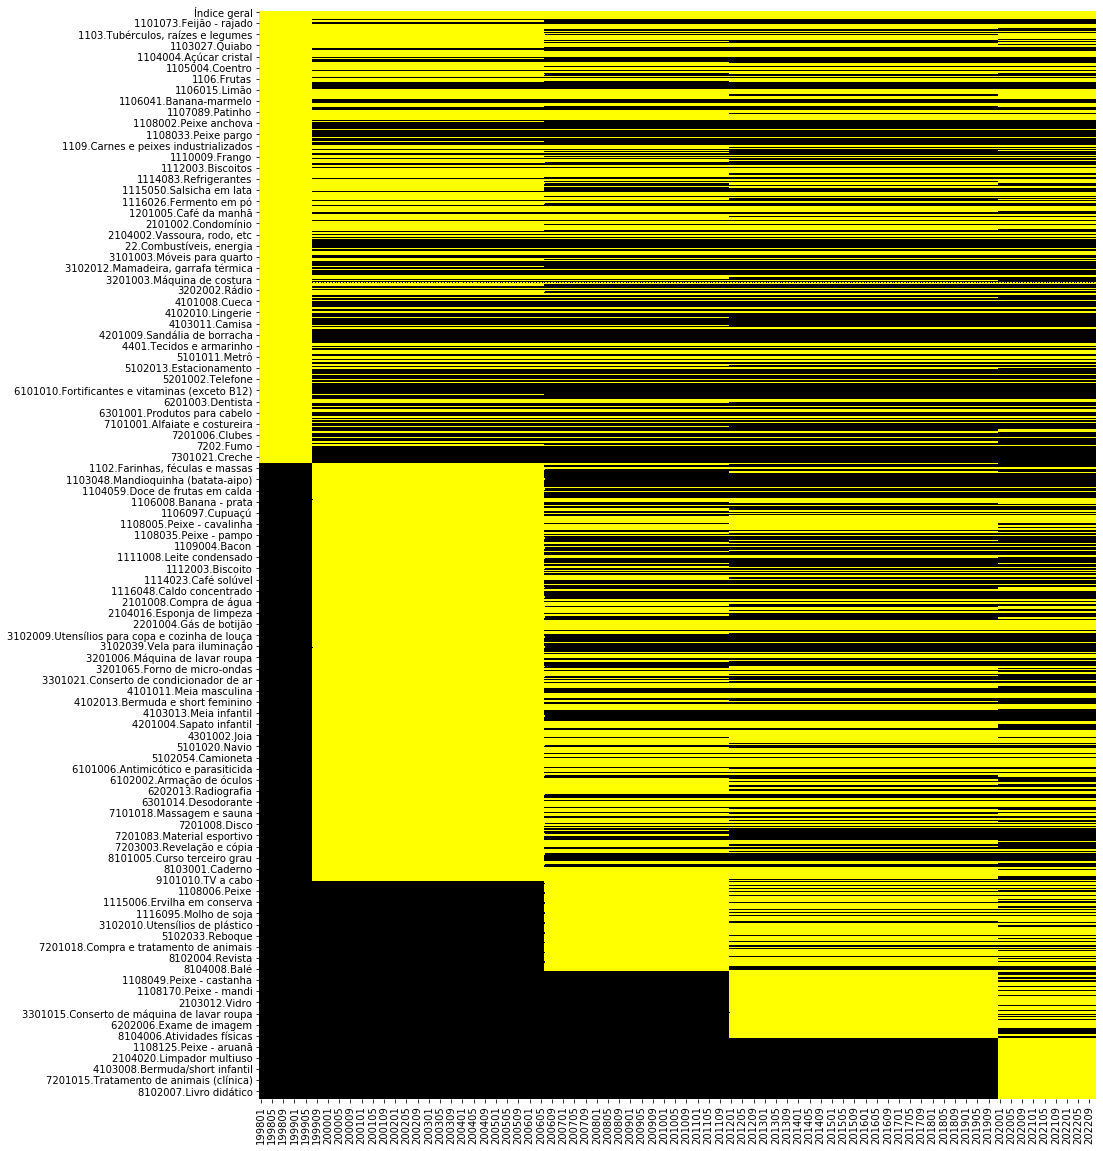

In [9]:
# Quero ver em um heatmap os valores nullos. EM AMRELO temos valores, o que esta escuro, não temos valor, representados como 
# null
#
#
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,20))
sns.heatmap(df_var_tot.isnull(), cbar=False, cmap="gnuplot_r")
plt.show()

Vamos tentar plotar a serie de valores nullos para analisar a situação

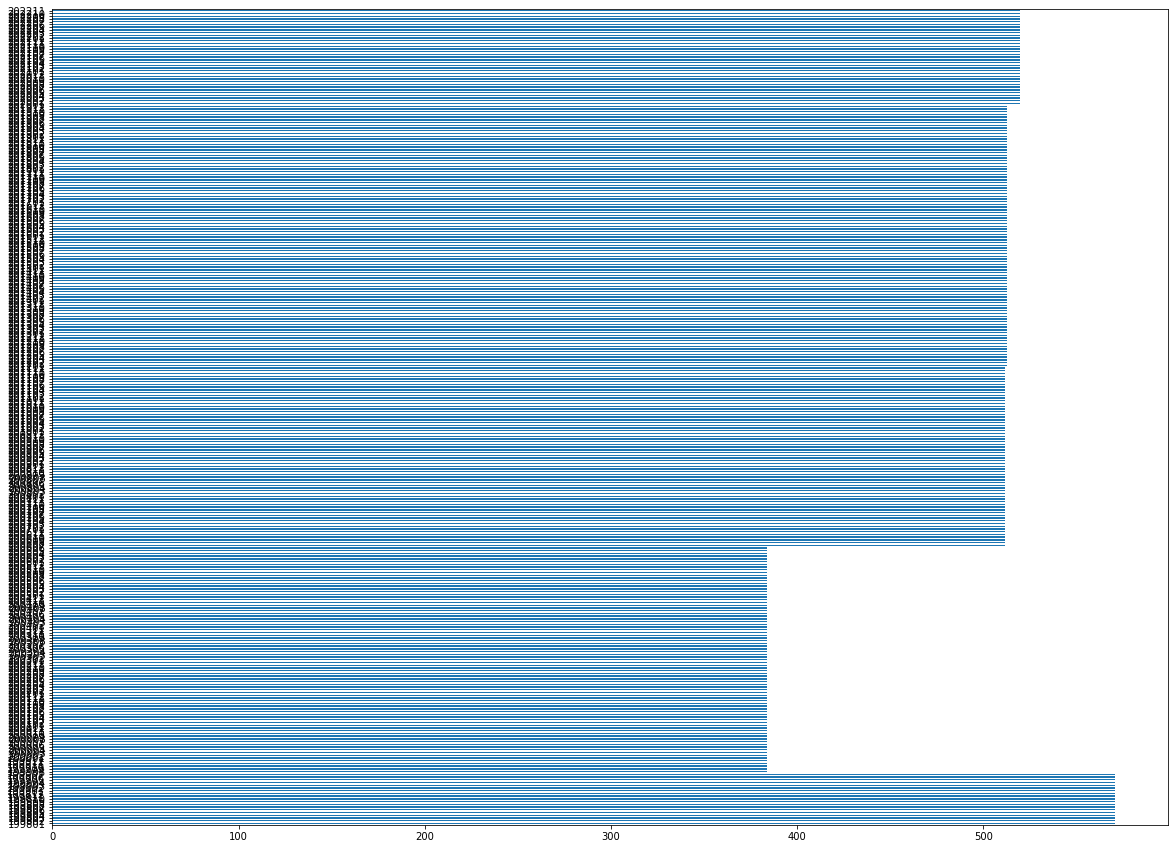

In [10]:
plt.figure(figsize=(20,15))
pd_serie_null_tot.plot.barh()

Não consegui tirar nenhuma conclusão em cima disso...

# Parte 3.2:
## Melhorar essa visualização

 - Transformar Indice em coluna.

Nosso DF's, tem Index ID para aquele Grupo/Subgrupo/Categoria/Item mais o nome deles. Vamos colocar como coluna

 - Separar em duas colunas. Numero ID e Itens,Categorias,Subgrupos,Grupos.
 
 - Criando coluna referencia, onde separa o que é IPCA de Grupo de Subgrupo de Categoria de Item
 
Pelo numero de caracteres consegimos fazer essa disntinção. 12=IPCA;1=Grupo;2=Subgrupo;4=Categoria;7=Iten

 - Filtro de Itens, para trabalhar em analese de valores nulos com eles.

In [11]:
# Transformar Indice em coluna.
#
#
df_var_tot.reset_index(inplace=True)
df_var_tot = df_var_tot.rename(columns = {'index':'Itens'})
#
#
# Separar em duas colunas. Numero ID e Itens,Categorias,Subgrupos,Grupos.
df_var_tot[['ID_Iten', 'Itens']] = df_var_tot['Itens'].str.split('.', 1, expand=True)
#
# Ordenando colunas
pd_serie_id_coluna = df_var_tot.pop('ID_Iten')
df_var_tot.insert(0,'ID_Iten',pd_serie_id_coluna)
df_var_tot.head(1)

,ID_Iten,Itens,199801,199802,199803,199804,199805,199806,199807,199808,...,202202,202203,202204,202205,202206,202207,202208,202209,202210,202211
0,Índice geral,None,0.59,0.44,0.28,0.17,0.48,0.04,-0.04,-0.38,...,1.02,1.54,1.03,0.52,0.73,-0.61,-0.30,-0.23,0.59,0.36


In [12]:
#Observando nome das colunas
df_var_tot.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['ID_Iten', 'Itens', '199801', '199802', '199803', '199804', '199805',
       '199806', '199807', '199808',
       ...
       '202202', '202203', '202204', '202205', '202206', '202207', '202208',
       '202209', '202210', '202211'],
      dtype='object', length=301)>

In [13]:
# Criando coluna referencia, onde separa o que é IPCA de Grupo de Subgrupo de Categoria de Item
#
lst_groupSeparater = []
for i in df_var_tot.ID_Iten:
    lst_groupSeparater.append(len(i))
    
df_var_tot['groupSeparater'] = lst_groupSeparater
pd_serie_groupSeparater = df_var_tot.pop('groupSeparater')
df_var_tot.insert(0,'groupSeparater',pd_serie_groupSeparater)
df_var_tot.head()

,groupSeparater,ID_Iten,Itens,199801,199802,199803,199804,199805,199806,199807,...,202202,202203,202204,202205,202206,202207,202208,202209,202210,202211
0,12,Índice geral,None,0.59,0.44,0.28,0.17,0.48,0.04,-0.04,...,1.02,1.54,1.03,0.52,0.73,-0.61,-0.30,-0.23,0.59,0.36
1,1,1,Alimentação e bebidas,0.64,0.35,0.46,0.73,1.59,0.37,-0.71,...,1.36,2.05,1.95,0.75,1.08,1.62,0.53,-0.27,0.68,0.33
2,2,11,Alimentação no domicílio,0.97,0.38,0.65,0.81,2.33,0.50,-0.90,...,1.74,2.62,2.41,0.83,1.03,1.84,0.44,-0.59,0.76,0.22
3,4,1101,"Cereais, leguminosas e oleaginosas",3.03,2.70,2.16,5.08,28.67,8.90,-5.73,...,1.59,3.94,3.84,1.20,0.69,-0.44,-1.15,-1.94,-1.67,0.79
4,7,1101002,Arroz,0.17,-0.65,-0.69,-1.08,11.18,8.62,1.54,...,0.59,3.90,3.71,0.12,-0.92,-0.03,-0.23,-1.52,-1.15,0.95


In [14]:
# Visulisando Apenas grupos.
#
df_var_tot[df_var_tot['groupSeparater'] == 1]

,groupSeparater,ID_Iten,Itens,199801,199802,199803,199804,199805,199806,199807,...,202202,202203,202204,202205,202206,202207,202208,202209,202210,202211
1,1,1,Alimentação e bebidas,0.64,0.35,0.46,0.73,1.59,0.37,-0.71,...,1.36,2.05,1.95,0.75,1.08,1.62,0.53,-0.27,0.68,0.33
186,1,2,Habitação,0.30,0.26,0.38,0.29,0.13,0.05,0.00,...,0.54,1.15,-1.14,-1.70,0.41,-1.05,0.10,0.60,0.34,0.51
216,1,3,Artigos de residência,0.35,0.36,1.15,-0.20,-0.06,0.37,-0.52,...,1.76,0.57,1.53,0.66,0.55,0.12,0.42,-0.13,0.39,-0.68
253,1,4,Vestuário,-0.57,-0.13,-0.48,-0.78,-0.14,0.00,-0.06,...,0.88,1.82,1.26,2.11,1.67,0.58,1.69,1.77,1.22,1.10
303,1,5,Transporte e comunicação,0.62,0.57,0.13,-0.08,-0.06,-0.10,0.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
331,1,6,Saúde e cuidados pessoais,0.57,0.39,0.57,0.45,0.50,0.03,0.52,...,0.47,0.88,1.77,1.01,1.24,0.49,1.31,0.57,1.16,0.02
367,1,7,Despesas pessoais,1.59,1.02,-0.04,-0.05,0.40,-0.41,0.35,...,0.64,0.59,0.48,0.52,0.49,1.13,0.54,0.95,0.57,0.21
653,1,5,Transportes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.46,3.02,1.91,1.34,0.57,-4.50,-3.37,-1.98,0.58,0.83
753,1,8,Educação,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.61,0.15,0.06,0.04,0.09,0.06,0.61,0.12,0.18,0.02
773,1,9,Comunicação,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.29,-0.05,0.08,0.72,0.16,0.07,-1.10,-2.08,-0.48,-0.14


Consegui observar que existem doi grupos numero 5. Voltaremos nisso mais tarde.

In [15]:
# Seprando apenas Itens...Filtro de Itens
#
df_var_itens = df_var_tot[df_var_tot['groupSeparater'] == 7]
df_var_itens.head(3)

,groupSeparater,ID_Iten,Itens,199801,199802,199803,199804,199805,199806,199807,...,202202,202203,202204,202205,202206,202207,202208,202209,202210,202211
4,7,1101002,Arroz,0.17,-0.65,-0.69,-1.08,11.18,8.62,1.54,...,0.59,3.90,3.71,0.12,-0.92,-0.03,-0.23,-1.52,-1.15,0.95
5,7,1101051,Feijão - mulatinho,8.91,1.31,11.14,17.10,85.05,7.76,-3.91,...,7.71,-4.29,1.66,-2.45,2.96,-0.28,3.30,2.26,-2.58,1.04
6,7,1101052,Feijão - preto,7.83,0.56,3.59,3.97,12.80,7.27,-6.31,...,3.05,2.60,0.76,-0.97,-3.33,-4.03,-3.07,-3.41,-1.76,1.18


In [16]:
# trabalhar em analese de valores nulos com eles.
#
pd_serie_null_var_itens = df_var_itens.isna().sum()
pd_serie_null_var_itens

groupSeparater      0
ID_Iten             0
Itens               0
199801            529
199802            529
                 ... 
202207            485
202208            485
202209            485
202210            485
202211            485
Length: 302, dtype: int64

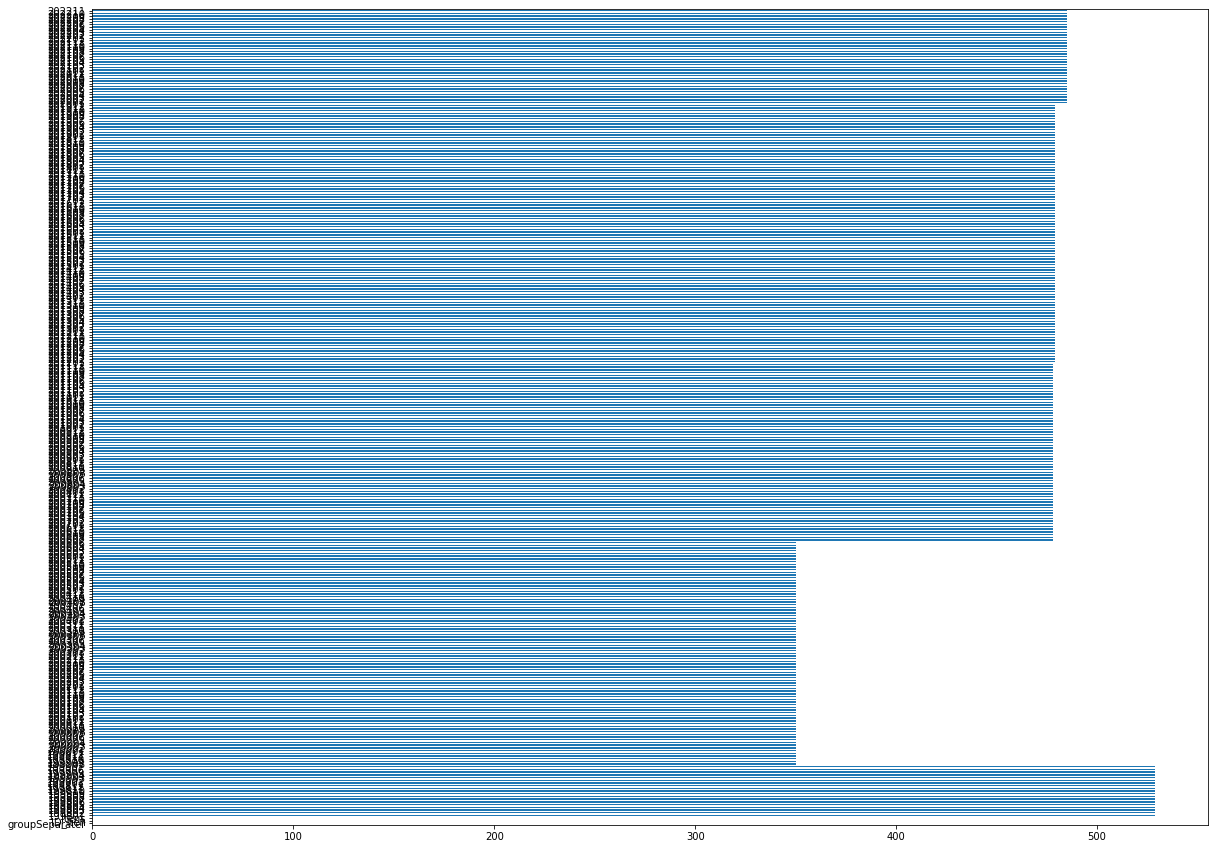

In [17]:
plt.figure(figsize=(20,15))
pd_serie_null_var_itens.plot.barh()

Não consegui tirar nada dessa visualisação

# Parte 3.3
 
 - Definição dos itens a serem removidos, e manter os itens para o modelo preditivo. 

#####  - Ja que da data de 2020 é a atual POF, gostaria de manter esses valores. Portanto vou separar esse dataframe e colocar em uma lista os ID's chaves dos ITENS 


 - Etão farei uma varredura de antes de 2020, tirando os itens que mais tem valores nullos no DF

In [18]:
# Separando em valor chave ID cada Grupo, Subgrupo, Categoria, Itens.
# Referencia em, maior iguual a 2020
df_variacao_2020.reset_index(inplace=True)
df_variacao_2020 = df_variacao_2020.rename(columns = {'index':'Itens'})
df_variacao_2020[['ID_Iten', 'Itens']] = df_variacao_2020['Itens'].str.split('.', 1, expand=True)
pd_serie_id_coluna = df_variacao_2020.pop('ID_Iten')
df_variacao_2020.insert(0,'ID_Iten',pd_serie_id_coluna)

# Definido em uma coluna que é Grupo, Subgrupo, Categoria, Itens.
#
lst_groupSeparater = []
for i in df_variacao_2020.ID_Iten:
    lst_groupSeparater.append(len(i))
    
df_variacao_2020['groupSeparater'] = lst_groupSeparater
pd_serie_groupSeparater = df_variacao_2020.pop('groupSeparater')
df_variacao_2020.insert(0,'groupSeparater',pd_serie_groupSeparater)

df_var_itens_2020 = df_variacao_2020[df_variacao_2020['groupSeparater'] == 7]
df_var_itens_2020.head()

,groupSeparater,ID_Iten,Itens,202001,202002,202003,202004,202005,202006,202007,...,202202,202203,202204,202205,202206,202207,202208,202209,202210,202211
4,7,1101002,Arroz,1.06,1.30,2.66,5.83,1.69,2.56,2.36,...,0.59,3.90,3.71,0.12,-0.92,-0.03,-0.23,-1.52,-1.15,0.95
5,7,1101051,Feijão - mulatinho,-0.37,-5.42,5.20,14.52,-1.34,5.82,1.06,...,7.71,-4.29,1.66,-2.45,2.96,-0.28,3.30,2.26,-2.58,1.04
6,7,1101052,Feijão - preto,-2.68,2.52,1.24,10.41,7.44,6.75,1.24,...,3.05,2.60,0.76,-0.97,-3.33,-4.03,-3.07,-3.41,-1.76,1.18
7,7,1101053,Feijão - macáçar (fradinho),5.39,2.39,6.52,5.55,2.62,2.88,3.77,...,4.16,1.24,1.29,0.57,-3.30,-0.63,-2.07,-1.67,-1.06,-0.25
8,7,1101073,Feijão - carioca (rajado),-2.60,-3.55,-1.74,16.64,8.52,5.08,-4.96,...,4.63,6.23,6.52,6.87,9.19,-1.19,-4.46,-3.86,-3.96,-0.29


In [19]:
# Exemplo de não existir valores nullos
#
df_var_itens_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377 entries, 4 to 456
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   groupSeparater  377 non-null    int64 
 1   ID_Iten         377 non-null    object
 2   Itens           377 non-null    object
 3   202001          377 non-null    object
 4   202002          377 non-null    object
 5   202003          377 non-null    object
 6   202004          377 non-null    object
 7   202005          377 non-null    object
 8   202006          377 non-null    object
 9   202007          377 non-null    object
 10  202008          377 non-null    object
 11  202009          377 non-null    object
 12  202010          377 non-null    object
 13  202011          377 non-null    object
 14  202012          377 non-null    object
 15  202101          377 non-null    object
 16  202102          377 non-null    object
 17  202103          377 non-null    object
 18  202104    

Aqui podemos ver que exite 377 Itens diferentes um dos outros. E que estão preenchidos completamente.

In [20]:
# Criando uma lista desses 377 Itens do Dataframe
lst_var_itens_2020 = []
for i in df_var_itens_2020['ID_Iten']:
    lst_var_itens_2020.append(i)
print(len(lst_var_itens_2020),lst_var_itens_2020)

377 ['1101002', '1101051', '1101052', '1101053', '1101073', '1101079', '1102001', '1102006', '1102008', '1102010', '1102012', '1102023', '1102029', '1102061', '1103002', '1103003', '1103004', '1103005', '1103020', '1103025', '1103026', '1103028', '1103043', '1103044', '1104003', '1104004', '1104018', '1104023', '1104032', '1104052', '1104060', '1104067', '1105001', '1105004', '1105005', '1105006', '1105010', '1105012', '1105019', '1106001', '1106003', '1106004', '1106005', '1106006', '1106008', '1106011', '1106012', '1106015', '1106017', '1106018', '1106019', '1106020', '1106021', '1106022', '1106023', '1106027', '1106028', '1106039', '1106051', '1106084', '1107009', '1107018', '1107031', '1107081', '1107084', '1107085', '1107087', '1107088', '1107089', '1107090', '1107091', '1107093', '1107094', '1107095', '1107096', '1107097', '1107099', '1107208', '1108002', '1108004', '1108011', '1108012', '1108013', '1108019', '1108029', '1108031', '1108032', '1108038', '1108045', '1108049', '1108

In [21]:
# DF antes de 2020
#
#
# Estou tirando o DF de 2020 nesse caso, para separar os itens que eu sei que vou usar
df_var_tot_2020_r = pd.concat([df_variacao_1998_1999,df_variacao_1999_2006,df_variacao_2006_2011,df_variacao_2012_2019], axis=1)

# Separando em valor chave ID cada Grupo, Subgrupo, Categoria, Itens.
#
df_var_tot_2020_r.reset_index(inplace=True)
df_var_tot_2020_r = df_var_tot_2020_r.rename(columns = {'index':'Itens'})
df_var_tot_2020_r[['ID_Iten', 'Itens']] = df_var_tot_2020_r['Itens'].str.split('.', 1, expand=True)
pd_serie_id_coluna = df_var_tot_2020_r.pop('ID_Iten')
df_var_tot_2020_r.insert(0,'ID_Iten',pd_serie_id_coluna)

# Definido em uma coluna que é Grupo, Subgrupo, Categoria, Itens.
#
lst_groupSeparater = []
for i in df_var_tot_2020_r.ID_Iten:
    lst_groupSeparater.append(len(i))
    
df_var_tot_2020_r['groupSeparater'] = lst_groupSeparater
pd_serie_groupSeparater = df_var_tot_2020_r.pop('groupSeparater')
df_var_tot_2020_r.insert(0,'groupSeparater',pd_serie_groupSeparater)



# filtro itens
df_var_tot_2020_r_itens = df_var_tot_2020_r[df_var_tot_2020_r['groupSeparater'] == 7]
# Aqui podemos ver que temos de 199801 até 201912
#
df_var_tot_2020_r_itens.columns

Index(['groupSeparater', 'ID_Iten', 'Itens', '199801', '199802', '199803',
       '199804', '199805', '199806', '199807',
       ...
       '201903', '201904', '201905', '201906', '201907', '201908', '201909',
       '201910', '201911', '201912'],
      dtype='object', length=267)

In [22]:
# Eleminando os 377 itens da POF de 2020 para frente.
#
#
for i in lst_var_itens_2020:
    print(f'\nID: {i} linhas de DF = '+str(len(df_var_tot_2020_r_itens)) )
    df_var_tot_2020_r_itens = df_var_tot_2020_r_itens[df_var_tot_2020_r_itens['ID_Iten'] != i]

# Olhando o que ocorreu de ERRADO!
len(df_var_tot_2020_r_itens)


ID: 1101002 linhas de DF = 808

ID: 1101051 linhas de DF = 807

ID: 1101052 linhas de DF = 806

ID: 1101053 linhas de DF = 805

ID: 1101073 linhas de DF = 803

ID: 1101079 linhas de DF = 800

ID: 1102001 linhas de DF = 799

ID: 1102006 linhas de DF = 798

ID: 1102008 linhas de DF = 797

ID: 1102010 linhas de DF = 796

ID: 1102012 linhas de DF = 795

ID: 1102023 linhas de DF = 794

ID: 1102029 linhas de DF = 793

ID: 1102061 linhas de DF = 792

ID: 1103002 linhas de DF = 792

ID: 1103003 linhas de DF = 791

ID: 1103004 linhas de DF = 790

ID: 1103005 linhas de DF = 789

ID: 1103020 linhas de DF = 788

ID: 1103025 linhas de DF = 787

ID: 1103026 linhas de DF = 786

ID: 1103028 linhas de DF = 785

ID: 1103043 linhas de DF = 784

ID: 1103044 linhas de DF = 783

ID: 1104003 linhas de DF = 782

ID: 1104004 linhas de DF = 781

ID: 1104018 linhas de DF = 780

ID: 1104023 linhas de DF = 777

ID: 1104032 linhas de DF = 775

ID: 1104052 linhas de DF = 773

ID: 1104060 linhas de DF = 771

ID: 110


ID: 5102051 linhas de DF = 437

ID: 5102053 linhas de DF = 436

ID: 5104001 linhas de DF = 434

ID: 5104002 linhas de DF = 433

ID: 5104003 linhas de DF = 431

ID: 5104005 linhas de DF = 430

ID: 6101001 linhas de DF = 429

ID: 6101002 linhas de DF = 427

ID: 6101003 linhas de DF = 425

ID: 6101004 linhas de DF = 424

ID: 6101006 linhas de DF = 422

ID: 6101007 linhas de DF = 419

ID: 6101009 linhas de DF = 417

ID: 6101010 linhas de DF = 415

ID: 6101011 linhas de DF = 413

ID: 6101013 linhas de DF = 411

ID: 6101014 linhas de DF = 409

ID: 6101051 linhas de DF = 407

ID: 6101064 linhas de DF = 406

ID: 6101148 linhas de DF = 405

ID: 6102012 linhas de DF = 405

ID: 6201002 linhas de DF = 405

ID: 6201003 linhas de DF = 404

ID: 6201005 linhas de DF = 403

ID: 6201007 linhas de DF = 401

ID: 6201010 linhas de DF = 400

ID: 6202003 linhas de DF = 399

ID: 6202004 linhas de DF = 398

ID: 6202006 linhas de DF = 396

ID: 6203001 linhas de DF = 394

ID: 6301001 linhas de DF = 393

ID: 630

317

In [23]:
print(f"{807-377} Diferente de 317. O dqataframe ficou menos do que eu esperava.\nPortato, existem valores duplicados, e vou vereficar isso logo abaixo!")

430 Diferente de 317. O dqataframe ficou menos do que eu esperava.
Portato, existem valores duplicados, e vou vereficar isso logo abaixo!


O valor retornando tem algo muito estranho, não está fazendo muito sentido...

### <hr>

# Parte 3.3.2
 - Analisar a situação, e foi descoberto o seguinte logo abaixo

#### - Existem valores duplicados. Portanto estou vereficando quem são eles, antes de 2020


 - Depois da descoberta, crio uma função para filtrar apenas os valores duplicados e visualisar o resultado de heat map null
 
#### - A partir da visualisação do heatmap null. Descubro que os mesmos ID's com nomes diferentes estiveram em periudos diferentes 

 - Com isso, resolvo montar uma função preenchendo os valores iguais na parte nulla. 
 
#### - como resultado de preencher valores nuluos pelo mesmo ID's, obsevro que foi positivo, e reponde a minha preocupação de os nomes serem diferentes com valores do mesmo ID.


 - No final elemino do DF ANTES de 2020, OS VALORES DUPLICADOS (lembrando que atualisei os valores nullos)

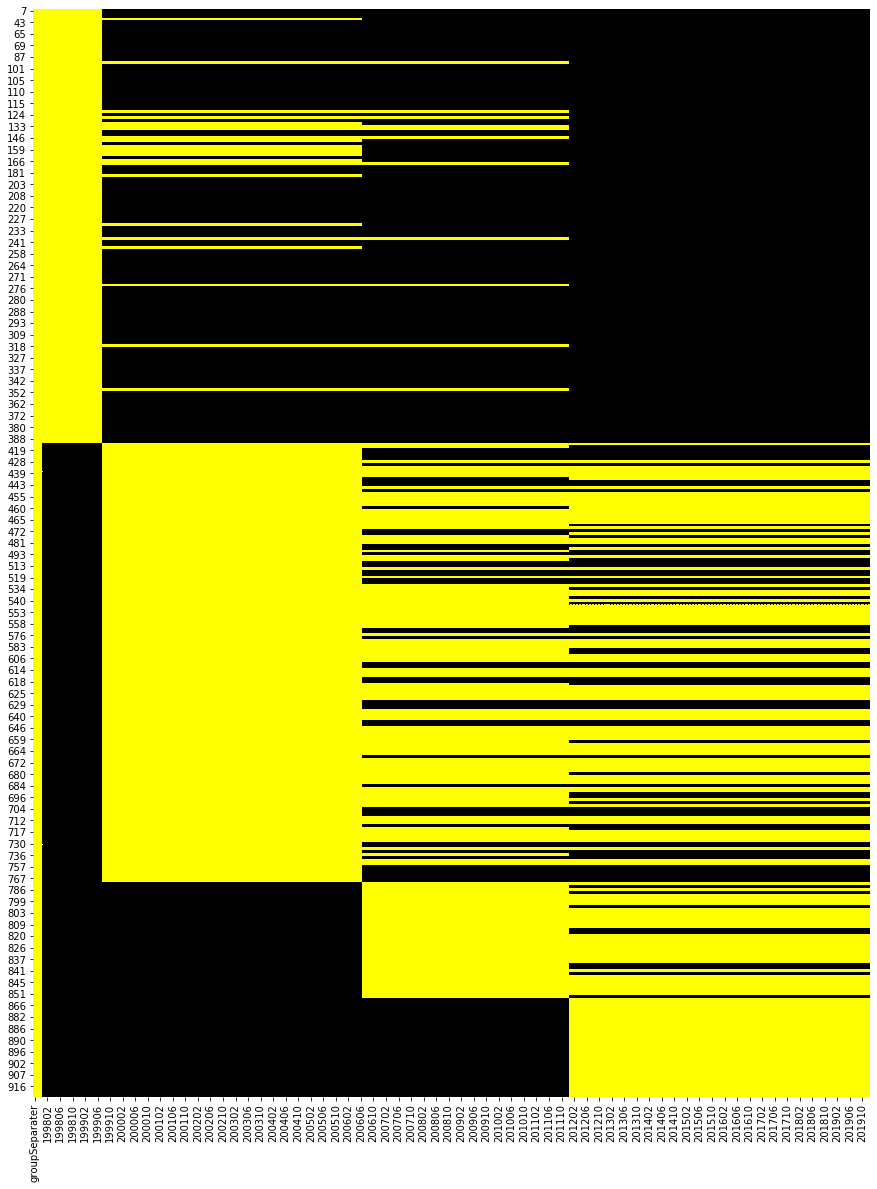

In [24]:
# Reset do DF
#
df_var_tot_2020_r_itens = df_var_tot_2020_r[df_var_tot_2020_r['groupSeparater'] == 7]

# Montando DF dos valores duplicados antes de 2020
#
df_IDs_duplicados = df_var_tot_2020_r_itens[df_var_tot_2020_r_itens.duplicated(subset=['ID_Iten'], keep=False)]




plt.figure(figsize=(15,20))
sns.heatmap(df_IDs_duplicados.isnull(), cbar=False, cmap="gnuplot_r")
plt.show()

In [25]:
# Ordenando os Itens
#
df_IDs_duplicados = df_IDs_duplicados.sort_values(by=['ID_Iten'])
df_IDs_duplicados.ID_Iten

7      1101053
406    1101053
863    1101073
10     1101073
407    1101073
        ...   
767    8102004
851    8102005
768    8102005
858    8104006
920    8104006
Name: ID_Iten, Length: 376, dtype: object

Aqui, percebi que esse itens duplicados tem o mesmo ID, Porem nomes diferentes. E os valores estão preenchidos em épocas diferentes. Parece que se formos juntar todos eles, o resultado fica OK.

Montei uma demonstraçãoa rapido abaixo

In [26]:
df_demonstracao_duplicados = df_IDs_duplicados[df_IDs_duplicados['ID_Iten'] == '1104018']
df_demonstracao_duplicados

,groupSeparater,ID_Iten,Itens,199801,199802,199803,199804,199805,199806,199807,...,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912
41,7,1104018,"Balas, chicletes",-0.27,-0.90,0.12,-0.16,-1.45,-0.03,0.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
422,7,1104018,"Balas, chicletes, etc.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
866,7,1104018,Balas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.94,-0.49,-0.59,-1.01,0.55,-0.14,-0.40,0.62,0.79,-1.21


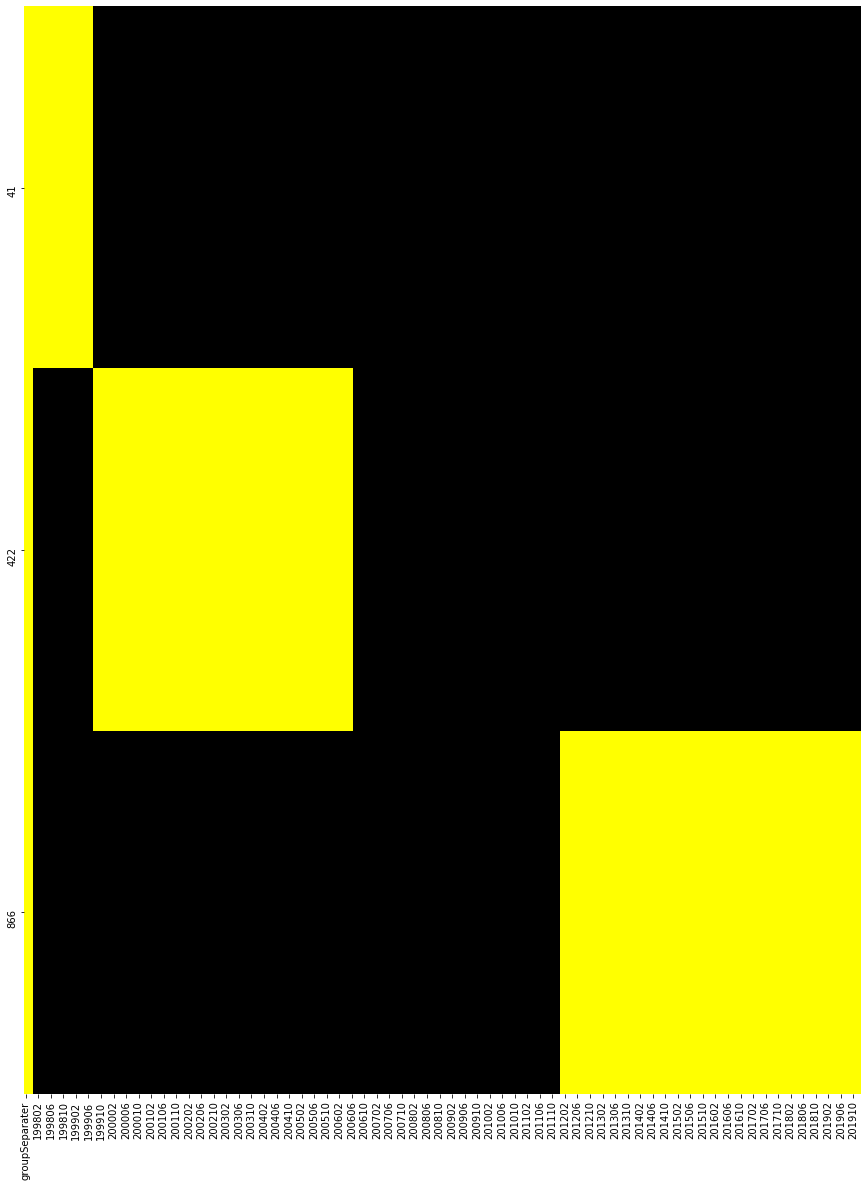

In [27]:
plt.figure(figsize=(15,20))
sns.heatmap(df_demonstracao_duplicados.isnull(), cbar=False, cmap="gnuplot_r")
plt.show()

# Repetidos, e representam a mesma coisa com nomes diferentes...
Os valores aparecem em tempos diferentes e dão sequiencia em outro momento do tempo, mostrando se referir da mesma coisa.
Portanto a forma é, posso juntar os valores uma nas outras.

1101053	Feijão - macassar | Feijão - macassar (fradinho) OK

1101073	Feijão - carioca (rajado) | Feijão - rajado OK

1103046	Batata-baroa | Mandioquinha (batata-baroa) OK

1104018	Balas, chicletes|Balas, chicletes, etc.| Balas OK


1104023	Chocolate em barra | Chocolate em barra e bombom OK 


8102004	Revista não técnica | Revista OK 

In [28]:
### **************AQUI NOS CONSEGUIMOS PREENCHER OS VALORES NULOS DE CADA UMA*******#######
df_duplicados_por_inteiro = df_IDs_duplicados.groupby('ID_Iten').apply(lambda x : x.ffill().bfill())
df_duplicados_por_inteiro

,groupSeparater,ID_Iten,Itens,199801,199802,199803,199804,199805,199806,199807,...,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912
7,7,1101053,Feijão - macassar,19.13,3.79,6.26,24.50,57.27,15.48,-0.12,...,9.45,0.71,-5.96,-2.05,1.39,-0.02,-1.45,0.65,4.53,6.54
406,7,1101053,Feijão - macassar (fradinho),19.13,3.79,6.26,24.50,57.27,15.48,-0.12,...,9.45,0.71,-5.96,-2.05,1.39,-0.02,-1.45,0.65,4.53,6.54
863,7,1101073,Feijão - carioca (rajado),10.71,20.18,9.81,22.16,69.91,8.94,-19.25,...,12.62,-10.13,-13.49,-16.42,-8.61,-0.64,-2.12,-0.55,8.22,23.66
10,7,1101073,Feijão - rajado,10.71,20.18,9.81,22.16,69.91,8.94,-19.25,...,12.62,-10.13,-13.49,-16.42,-8.61,-0.64,-2.12,-0.55,8.22,23.66
407,7,1101073,Feijão - carioca (rajado)),10.71,20.18,9.81,22.16,69.91,8.94,-19.25,...,12.62,-10.13,-13.49,-16.42,-8.61,-0.64,-2.12,-0.55,8.22,23.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,7,8102004,Revista não técnica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,2.17,0.64,0.00,0.00,0.00,0.41,1.75
851,7,8102005,Livro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.56,0.16,-0.26,-0.55,0.11,1.07,-0.44,0.86,0.30,0.60
768,7,8102005,Livro não didático,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.56,0.16,-0.26,-0.55,0.11,1.07,-0.44,0.86,0.30,0.60
858,7,8104006,Ginástica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.68,0.82,-0.04,0.65,-0.03,-0.53,-0.09,0.26,0.52,0.45


In [29]:
df_demonstracao_duplicados = df_duplicados_por_inteiro[df_duplicados_por_inteiro['ID_Iten'] == '1104018']
df_demonstracao_duplicados

,groupSeparater,ID_Iten,Itens,199801,199802,199803,199804,199805,199806,199807,...,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912
41,7,1104018,"Balas, chicletes",-0.27,-0.90,0.12,-0.16,-1.45,-0.03,0.24,...,0.94,-0.49,-0.59,-1.01,0.55,-0.14,-0.40,0.62,0.79,-1.21
422,7,1104018,"Balas, chicletes, etc.",-0.27,-0.90,0.12,-0.16,-1.45,-0.03,0.24,...,0.94,-0.49,-0.59,-1.01,0.55,-0.14,-0.40,0.62,0.79,-1.21
866,7,1104018,Balas,-0.27,-0.90,0.12,-0.16,-1.45,-0.03,0.24,...,0.94,-0.49,-0.59,-1.01,0.55,-0.14,-0.40,0.62,0.79,-1.21


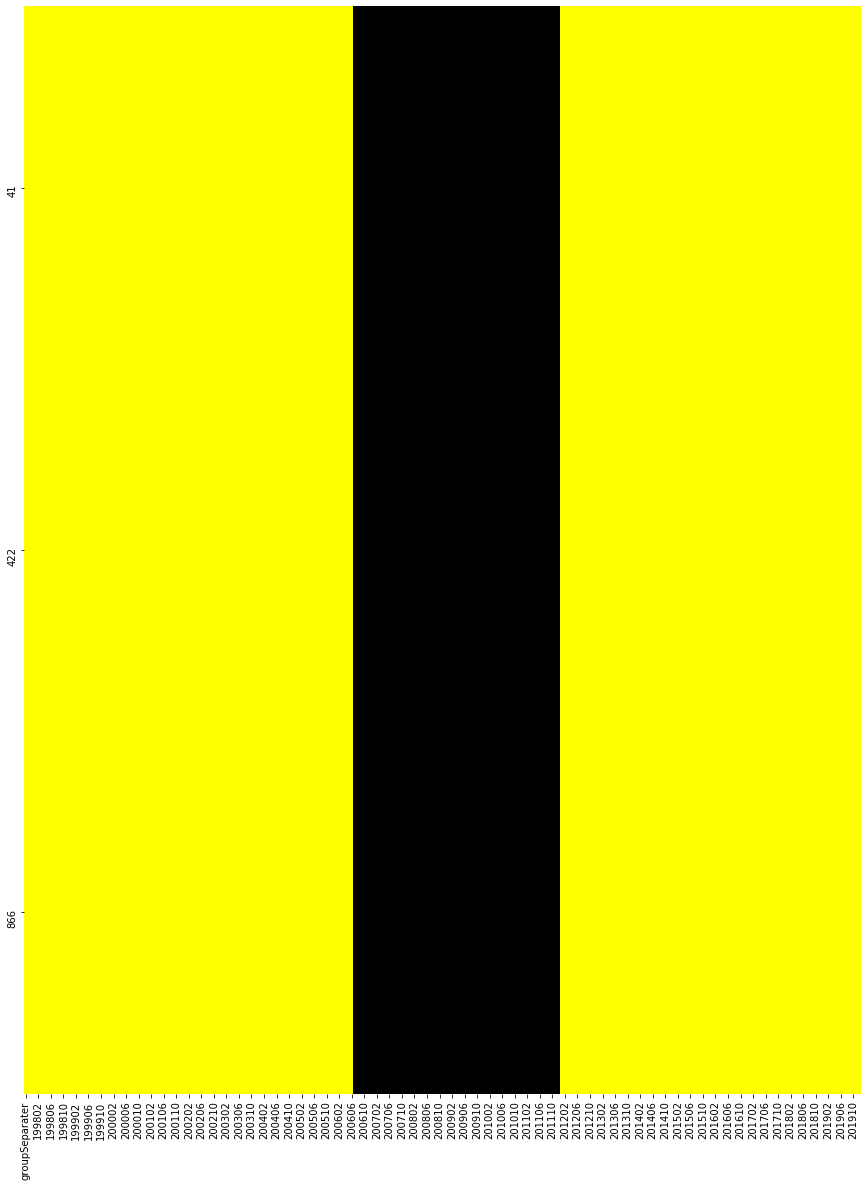

In [30]:
plt.figure(figsize=(15,20))
sns.heatmap(df_demonstracao_duplicados.isnull(), cbar=False, cmap="gnuplot_r")
plt.show()

#### Então pretendo dar continuidade. Inserindo os valores nullos em cima dos Itens repetidos e tirar as duplicados. Assim preenchendo todas as linhas duplicadas para os mesmo ID's. E montando uma vereficação cnfiavel.

#### <hr>

In [31]:
### **************AQUI NOS CONSEGUIMOS PREENCHER OS VALORES NULOS DE CADA UMA*******#######
df_var_tot_2020_r_itens_duplicados_preenchidos = df_var_tot_2020_r_itens.groupby('ID_Iten').apply(lambda x : x.ffill().bfill())

# Dropamos os valores duplicados
df_var_tot_2020_r_itens_duplicados_preenchidos = df_var_tot_2020_r_itens_duplicados_preenchidos.drop_duplicates(subset=['ID_Iten'], keep='first')

# numero de linhas
print(len(df_var_tot_2020_r_itens_duplicados_preenchidos))

611


In [32]:
for i in lst_var_itens_2020:
    print(f'\nID 377: {i} numero de linhas no df = '+ str(len(df_var_tot_2020_r_itens_duplicados_preenchidos)))
    df_var_tot_2020_r_itens_duplicados_preenchidos = df_var_tot_2020_r_itens_duplicados_preenchidos[df_var_tot_2020_r_itens_duplicados_preenchidos['ID_Iten'] != i]

# Olhando o que ocorreu de ERRADO!
if 611-377 <= len(df_var_tot_2020_r_itens_duplicados_preenchidos):
    
    print('\nOK, aceitavel, porque pode ter valores acima de 2020 que não tiveram antes')
    print(str(611-377)+ ' <= '+ str(len(df_var_tot_2020_r_itens_duplicados_preenchidos)))
else:
    print("NOK")


ID 377: 1101002 numero de linhas no df = 611

ID 377: 1101051 numero de linhas no df = 610

ID 377: 1101052 numero de linhas no df = 609

ID 377: 1101053 numero de linhas no df = 608

ID 377: 1101073 numero de linhas no df = 607

ID 377: 1101079 numero de linhas no df = 606

ID 377: 1102001 numero de linhas no df = 605

ID 377: 1102006 numero de linhas no df = 604

ID 377: 1102008 numero de linhas no df = 603

ID 377: 1102010 numero de linhas no df = 602

ID 377: 1102012 numero de linhas no df = 601

ID 377: 1102023 numero de linhas no df = 600

ID 377: 1102029 numero de linhas no df = 599

ID 377: 1102061 numero de linhas no df = 598

ID 377: 1103002 numero de linhas no df = 598

ID 377: 1103003 numero de linhas no df = 597

ID 377: 1103004 numero de linhas no df = 596

ID 377: 1103005 numero de linhas no df = 595

ID 377: 1103020 numero de linhas no df = 594

ID 377: 1103025 numero de linhas no df = 593

ID 377: 1103026 numero de linhas no df = 592

ID 377: 1103028 numero de linhas 


ID 377: 2103040 numero de linhas no df = 443

ID 377: 2103041 numero de linhas no df = 442

ID 377: 2103042 numero de linhas no df = 441

ID 377: 2103048 numero de linhas no df = 440

ID 377: 2103049 numero de linhas no df = 439

ID 377: 2103055 numero de linhas no df = 438

ID 377: 2104003 numero de linhas no df = 437

ID 377: 2104005 numero de linhas no df = 436

ID 377: 2104008 numero de linhas no df = 435

ID 377: 2104009 numero de linhas no df = 434

ID 377: 2104012 numero de linhas no df = 433

ID 377: 2104015 numero de linhas no df = 432

ID 377: 2104016 numero de linhas no df = 431

ID 377: 2104019 numero de linhas no df = 430

ID 377: 2104020 numero de linhas no df = 430

ID 377: 2104041 numero de linhas no df = 429

ID 377: 2104085 numero de linhas no df = 428

ID 377: 2201003 numero de linhas no df = 428

ID 377: 2201004 numero de linhas no df = 427

ID 377: 2201005 numero de linhas no df = 426

ID 377: 2202003 numero de linhas no df = 425

ID 377: 3101002 numero de linhas 

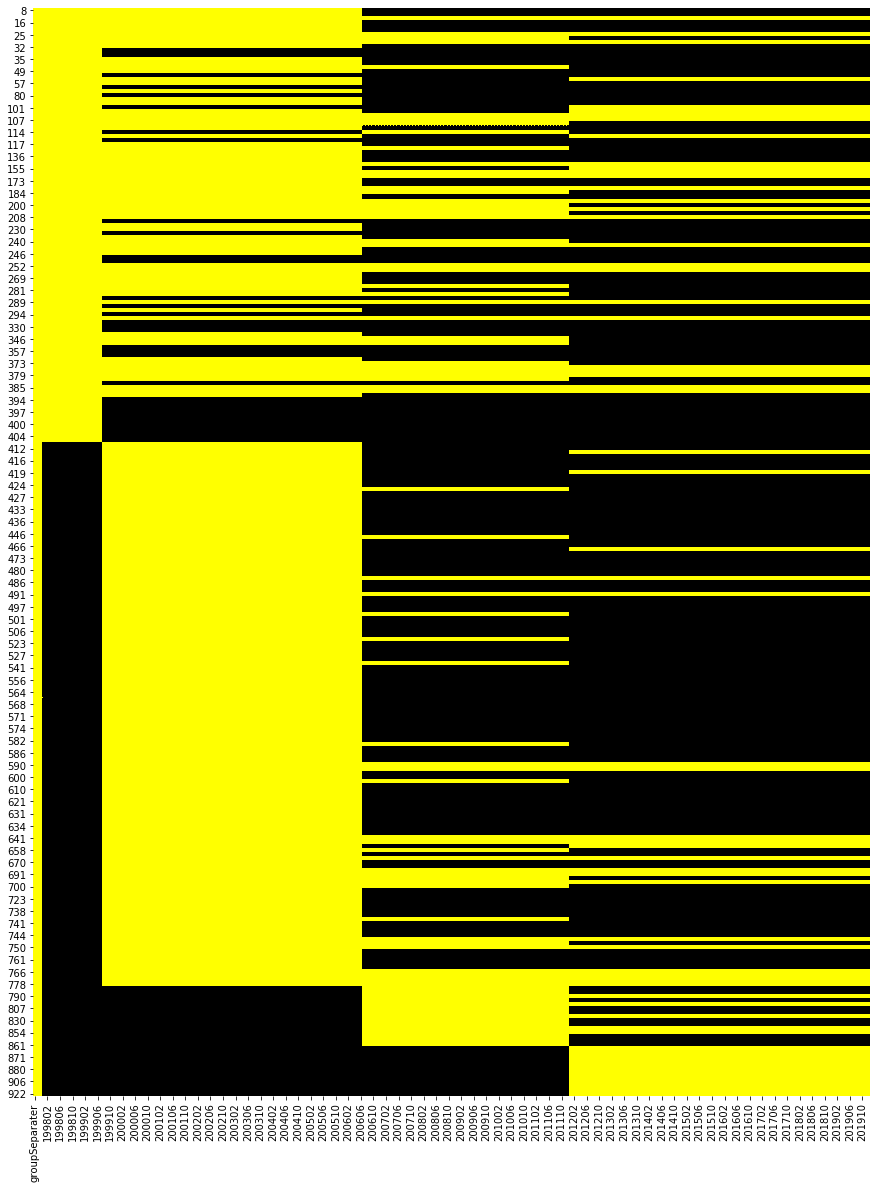

In [33]:
plt.figure(figsize=(15,20))
sns.heatmap(df_var_tot_2020_r_itens_duplicados_preenchidos.isnull(), cbar=False, cmap="gnuplot_r")
plt.show()

# AGORA VAMOS VASCULHAR QUEM FICA E QUEM SAI E PORQUE!

Soma dos valores nullos

[7]


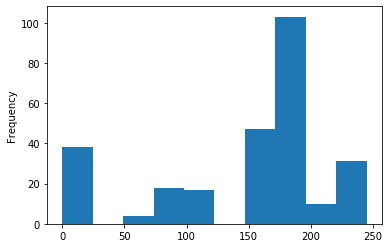

In [34]:
print(df_var_tot_2020_r_itens_duplicados_preenchidos.groupSeparater.unique())


df_var_tot_2020_r_itens_duplicados_preenchidos['ID_Iten'] = df_var_tot_2020_r_itens_duplicados_preenchidos['ID_Iten'].astype('int')



# DF dos valores nulos para cada Item. No df antes de 2020
#
pd_serie_null_tot = df_var_tot_2020_r_itens_duplicados_preenchidos.drop(columns=['groupSeparater','Itens'])
pd_serie_null_tot.set_index('ID_Iten', inplace=True)
pd_serie_null_tot = pd_serie_null_tot.isna().sum(axis=1)
pd_serie_null_tot = pd_serie_null_tot.sort_values(ascending=True)



# Pelo visto no Histogrmaa mostra que os mais comuns são os de 50 valores nullos e de 200
#
pd_serie_null_tot.plot(kind="hist")

Com o Histograma, podemos ver a frquencia dos valores nullos. Mostrando que temos muitos valores nullos de ID's batendo acima de 175. 

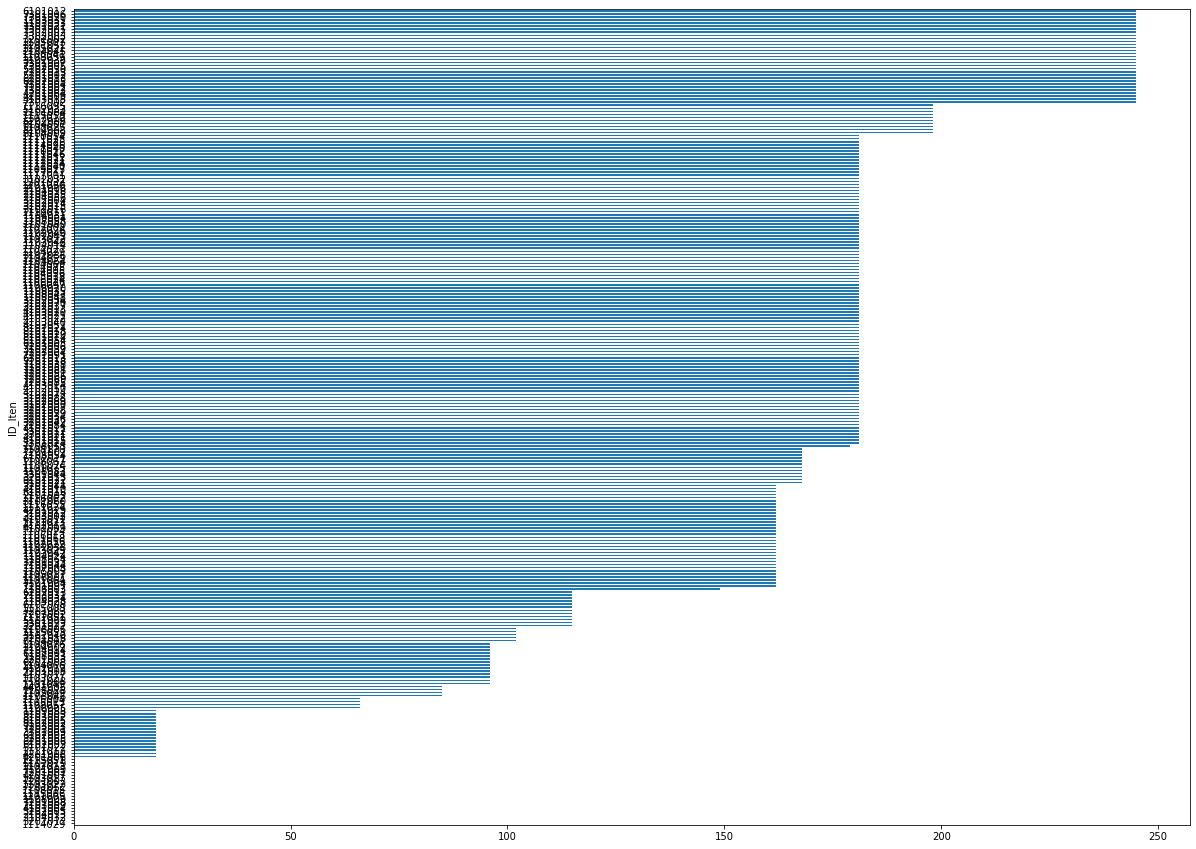

In [35]:
plt.figure(figsize=(20,15))
pd_serie_null_tot.plot.barh()

Melhor ir fazendo por filtro de 50 a 50...

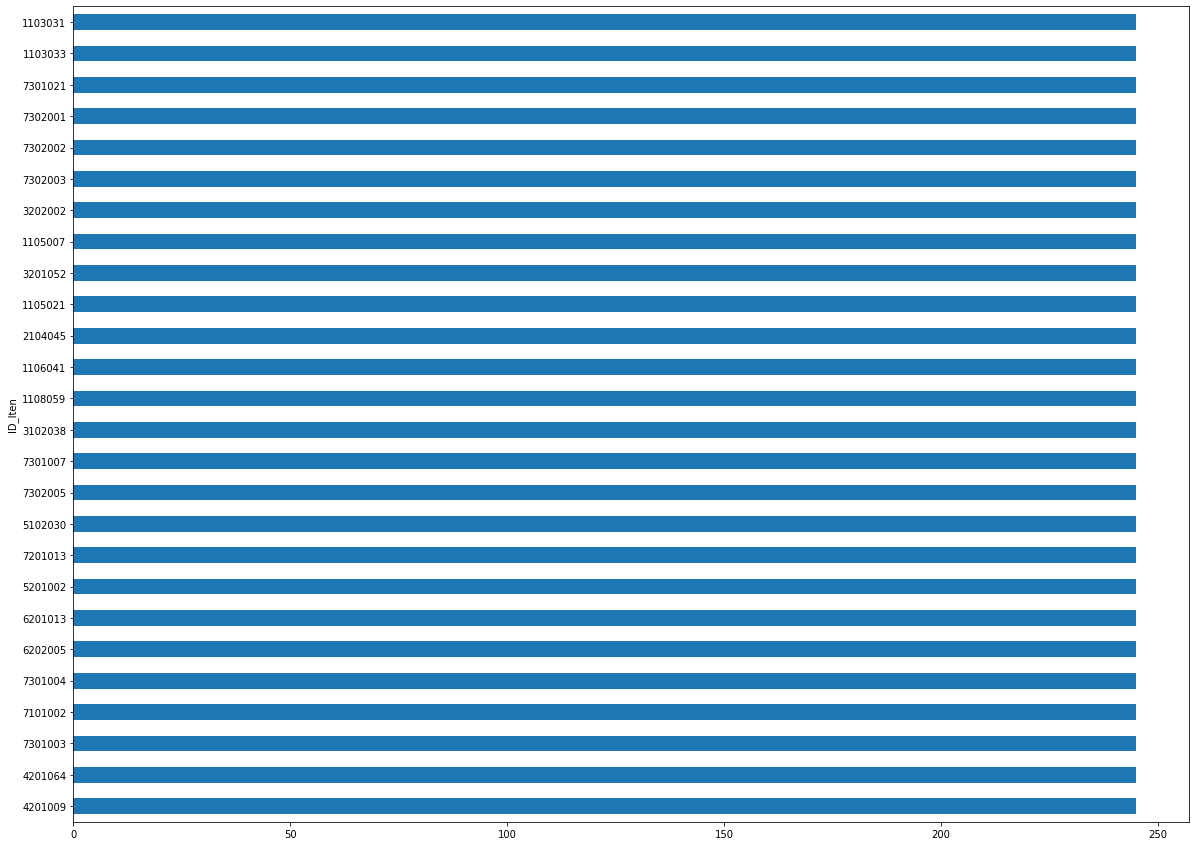

In [36]:
plt.figure(figsize=(20,15))
pd_serie_null_tot[239:265].plot.barh()

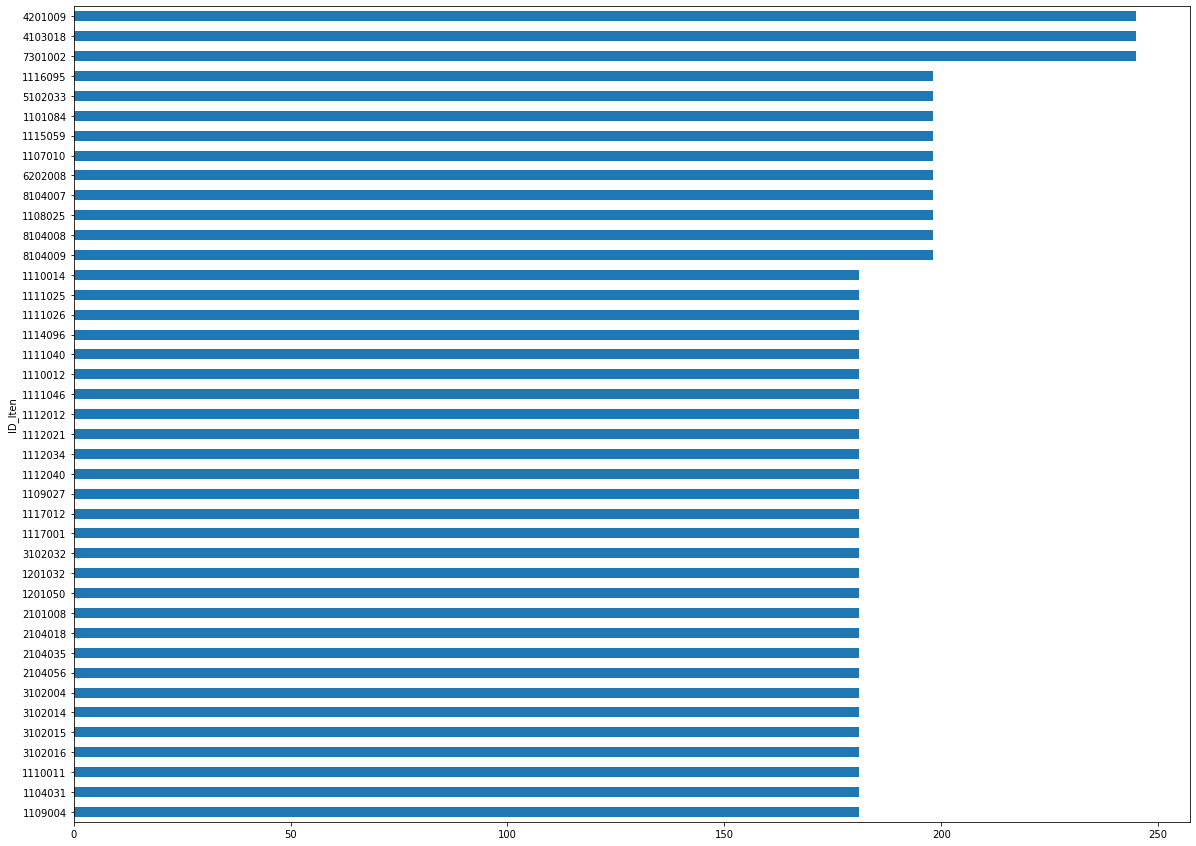

In [37]:
plt.figure(figsize=(20,15))
pd_serie_null_tot[199:240].plot.barh()

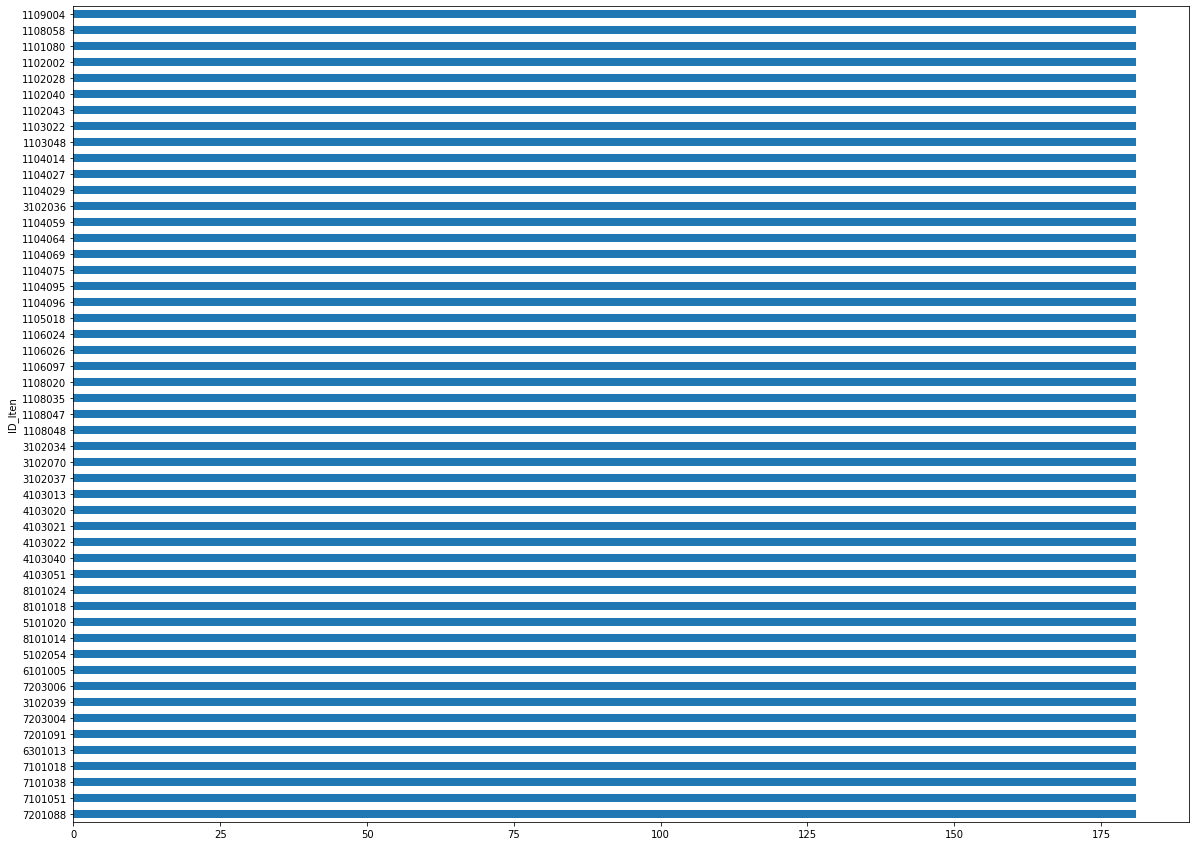

In [38]:
plt.figure(figsize=(20,15))
pd_serie_null_tot[149:200].plot.barh()

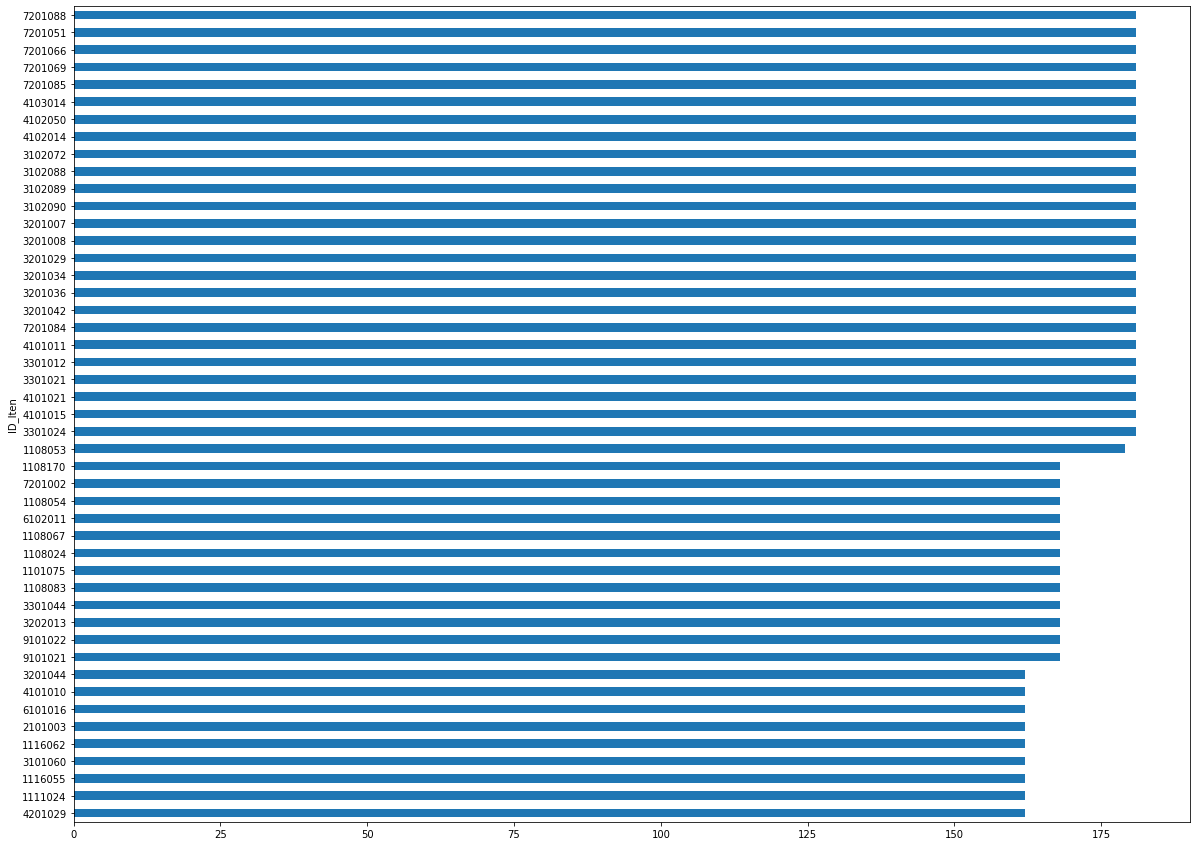

In [39]:
plt.figure(figsize=(20,15))
pd_serie_null_tot[103:150].plot.barh()

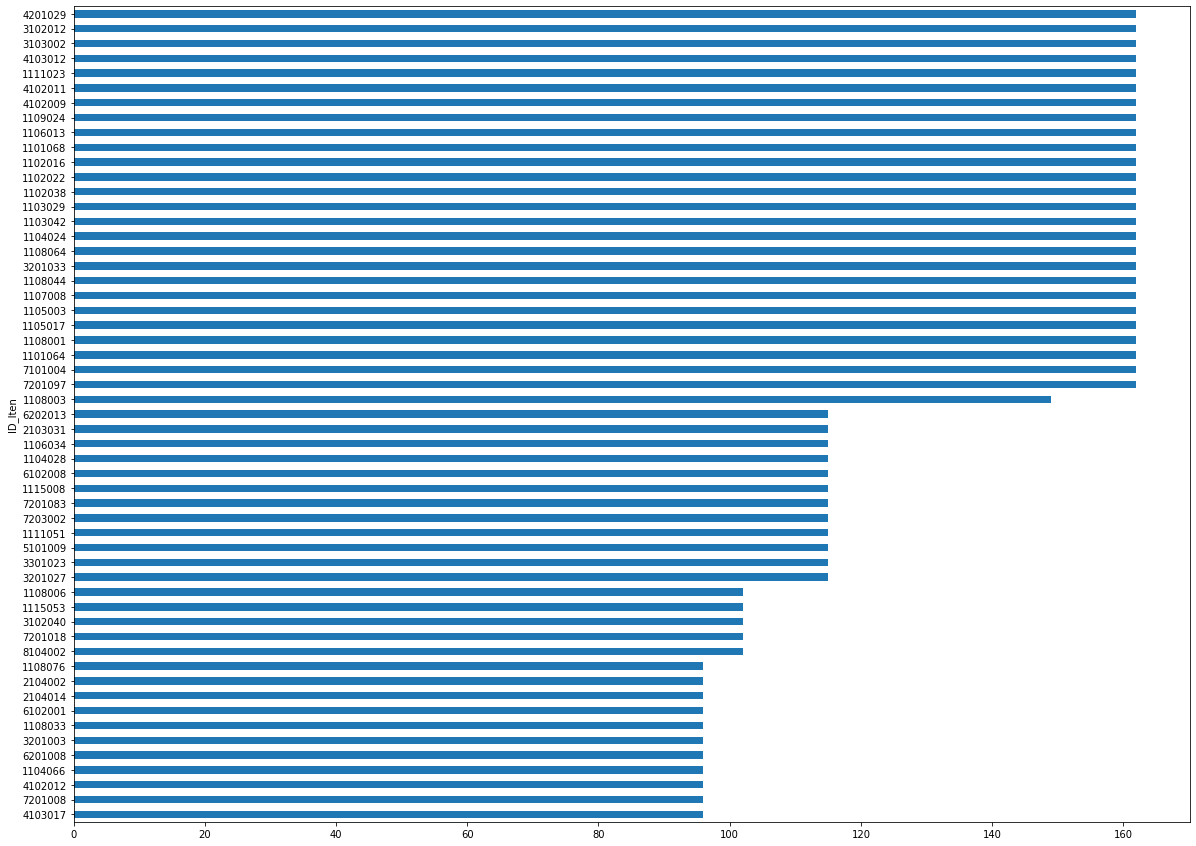

In [40]:
plt.figure(figsize=(20,15))
pd_serie_null_tot[49:104].plot.barh()

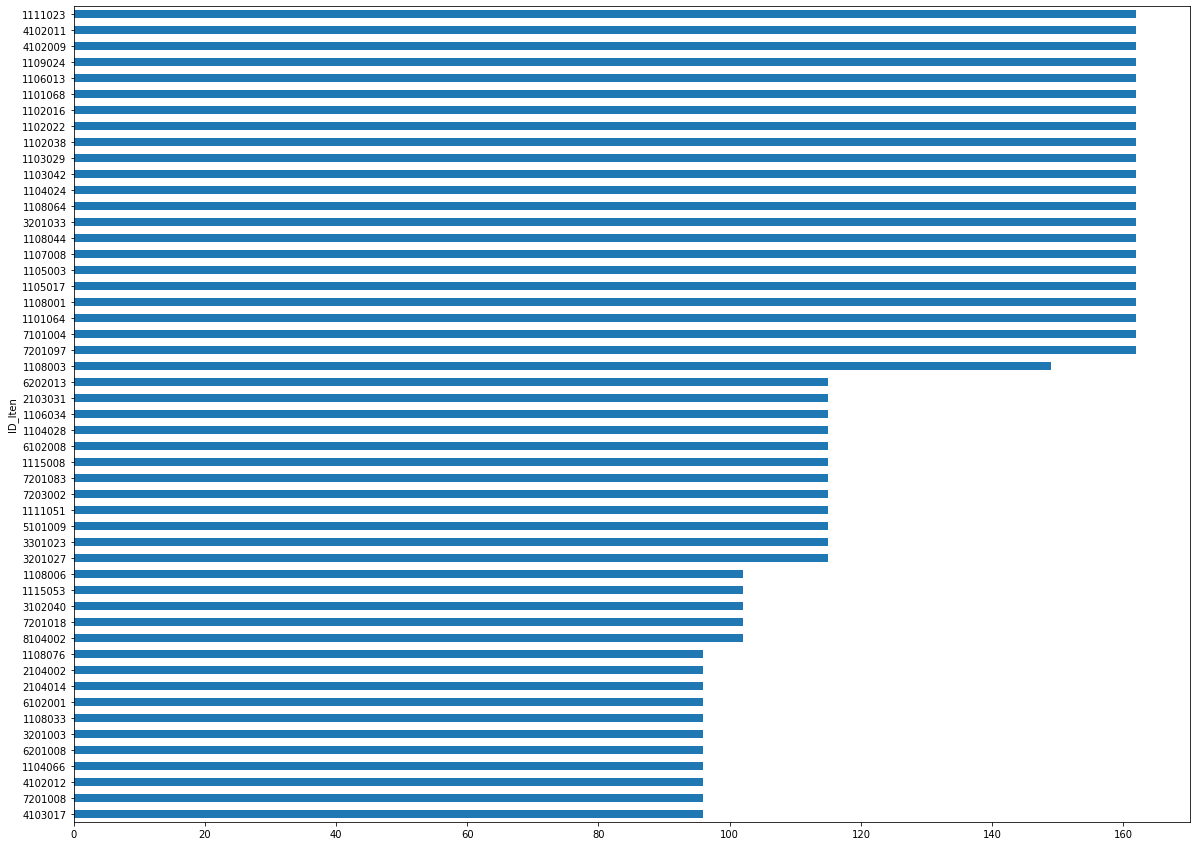

In [41]:
plt.figure(figsize=(20,15))
pd_serie_null_tot[49:100].plot.barh()

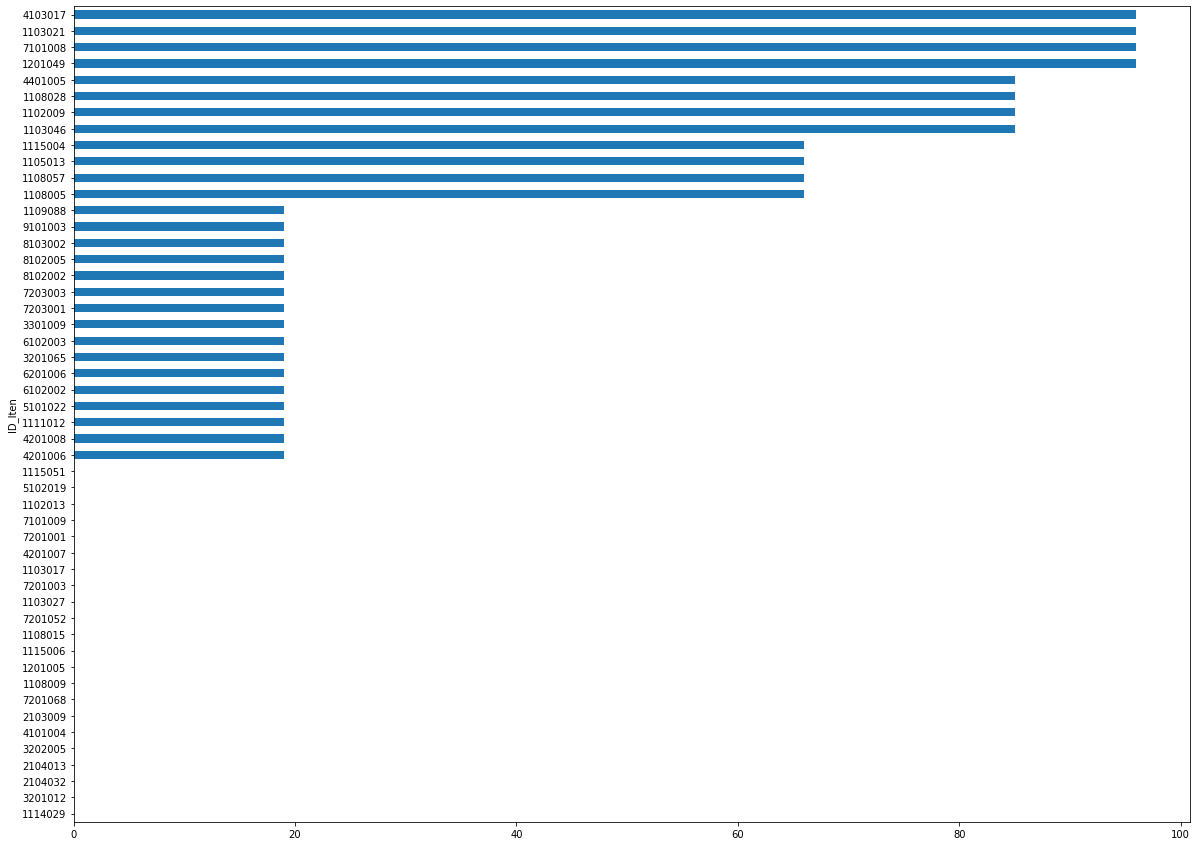

In [42]:
plt.figure(figsize=(20,15))
pd_serie_null_tot[:50].plot.barh()

Quero analisar os valores de itens com mais de 175 valores nulos

124


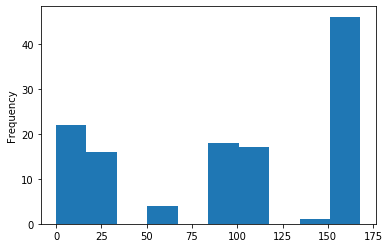

In [43]:
pd_null_b175 = pd_serie_null_tot[pd_serie_null_tot < 175]
print(len(pd_null_b175))

pd_null_b175.plot(kind="hist")

In [44]:
# Lista dos indesejaveis itens
#
lst_iten_null_b175 = pd_null_b175.index.tolist()
lst_iten_null_b175[:8]

[1114029, 3201012, 2104032, 2104013, 3202005, 4101004, 2103009, 7201068]

# 4 Definindo DF com os valores itens desejados

 - juntando duas listas e criando uma lista dos IDs que eu quero.
 
 - Juntando Dataframes antes de 2020 e depois de 2020

 - Filtro em cima do DF total.
 
 - Visualisação dos dados.



juntando duas listas e criando uma lista dos IDs que eu quero.

In [45]:
# coletando a lista dos ID's 2020
#
lst_2020 = list(df_var_itens_2020['ID_Iten'])

print(len(lst_iten_null_b175),len(lst_2020))

# Convertendo todos valores em str
#
lst_2020 = [str(x) for x in lst_2020]
lst_iten_null_b175 = [str(x) for x in lst_iten_null_b175]

print(lst_iten_null_b175,lst_2020)

124 377
['1114029', '3201012', '2104032', '2104013', '3202005', '4101004', '2103009', '7201068', '1108009', '1201005', '1115006', '1108015', '7201052', '1103027', '7201003', '1103017', '4201007', '7201001', '7101009', '1102013', '5102019', '1115051', '4201006', '4201008', '1111012', '5101022', '6102002', '6201006', '3201065', '6102003', '3301009', '7203001', '7203003', '8102002', '8102005', '8103002', '9101003', '1109088', '1108005', '1108057', '1105013', '1115004', '1103046', '1102009', '1108028', '4401005', '1201049', '7101008', '1103021', '4103017', '7201008', '4102012', '1104066', '6201008', '3201003', '1108033', '6102001', '2104014', '2104002', '1108076', '8104002', '7201018', '3102040', '1115053', '1108006', '3201027', '3301023', '5101009', '1111051', '7203002', '7201083', '1115008', '6102008', '1104028', '1106034', '2103031', '6202013', '1108003', '7201097', '7101004', '1101064', '1108001', '1105017', '1105003', '1107008', '1108044', '3201033', '1108064', '1104024', '1103042', '

In [46]:

# Concatenando as duas listas
#
lst_itens_tot = lst_2020 + lst_iten_null_b175
print(len(lst_itens_tot))

# Removendo duplicados da lista
#
# Removing duplicates by first changing to a set and then back to a list
lst_itens_tot = list(set(lst_itens_tot))
print(type(lst_itens_tot),len(lst_itens_tot),lst_itens_tot)


501
<class 'list'> 501 ['1116013', '3102001', '3301044', '3301002', '1108001', '7101014', '4102011', '5101002', '1201049', '4103008', '9101019', '7101004', '1107087', '1108075', '1109002', '4102004', '7201015', '1108049', '7201008', '2103014', '1114091', '1114022', '1111008', '8101045', '8102002', '1106020', '1107093', '6201003', '4201004', '8102008', '1105017', '3301022', '3102010', '6301001', '1106005', '2103012', '1108080', '3202008', '1115075', '1106034', '1107094', '6101051', '6301011', '1101064', '5102001', '7201019', '5101051', '1109007', '3201001', '1104028', '9101022', '1108045', '5102051', '3201012', '1105005', '2104020', '6101016', '8101004', '1101075', '1111038', '7201090', '1109010', '5101022', '2104014', '6202013', '2104002', '1104067', '1111019', '5101007', '1108057', '5102004', '1116055', '1106001', '1107095', '1105013', '2101012', '8103014', '1108052', '1106021', '9101002', '1116022', '1101068', '4301004', '7101008', '8102004', '1108054', '1106023', '8104001', '1103027

Juntando Dataframes antes de 2020 e depois de 2020

In [47]:

# Reset do dataframe
if "index" in df_e.columns:
    df_e = df_e.set_index('index')
df_var_tot = pd.concat([df_a,df_b,df_c,df_d,df_e], axis=1)

# Transformar Indice em coluna.
#
#
df_var_tot.reset_index(inplace=True)
df_var_tot = df_var_tot.rename(columns = {'index':'Itens'})
#
#
# Separar em duas colunas. Numero ID e Itens,Categorias,Subgrupos,Grupos.
df_var_tot[['ID_Iten', 'Itens']] = df_var_tot['Itens'].str.split('.', 1, expand=True)
#
# Ordenando colunas
pd_serie_id_coluna = df_var_tot.pop('ID_Iten')
df_var_tot.insert(0,'ID_Iten',pd_serie_id_coluna)
df_var_tot.head(1)


# Mudando valor Nullo para IPCA
df_var_tot["Itens"].fillna("IPCA", limit = 1, inplace = True)
# Mudando celula Indice geral para zero
df_var_tot['ID_Iten'] = df_var_tot['ID_Iten'].replace('Índice geral','0')





### **************AQUI NOS CONSEGUIMOS PREENCHER OS VALORES NULOS DE CADA UMA*******#######
print(len(df_var_tot))

df_var_tot = df_var_tot.groupby('ID_Iten').apply(lambda x : x.ffill().bfill())

# Dropamos os valores duplicados
df_var_tot = df_var_tot.drop_duplicates(subset=['ID_Iten'], keep='first')

# numero de linhas
print(len(df_var_tot))

df_var_tot.head()

977
732


,ID_Iten,Itens,199801,199802,199803,199804,199805,199806,199807,199808,...,202202,202203,202204,202205,202206,202207,202208,202209,202210,202211
0,0,IPCA,0.59,0.44,0.28,0.17,0.48,0.04,-0.04,-0.38,...,1.02,1.54,1.03,0.52,0.73,-0.61,-0.30,-0.23,0.59,0.36
1,1,Alimentação e bebidas,0.64,0.35,0.46,0.73,1.59,0.37,-0.71,-0.90,...,1.36,2.05,1.95,0.75,1.08,1.62,0.53,-0.27,0.68,0.33
2,11,Alimentação no domicílio,0.97,0.38,0.65,0.81,2.33,0.50,-0.90,-1.16,...,1.74,2.62,2.41,0.83,1.03,1.84,0.44,-0.59,0.76,0.22
3,1101,"Cereais, leguminosas e oleaginosas",3.03,2.70,2.16,5.08,28.67,8.90,-5.73,-5.09,...,1.59,3.94,3.84,1.20,0.69,-0.44,-1.15,-1.94,-1.67,0.79
4,1101002,Arroz,0.17,-0.65,-0.69,-1.08,11.18,8.62,1.54,-0.57,...,0.59,3.90,3.71,0.12,-0.92,-0.03,-0.23,-1.52,-1.15,0.95


Filtro em cima do DF total.

In [48]:
# Definido em uma coluna que é Grupo, Subgrupo, Categoria, Itens.
#
lst_groupSeparater = []
for i in df_var_tot.ID_Iten:
    lst_groupSeparater.append(len(i))
    
df_var_tot['groupSeparater'] = lst_groupSeparater
pd_serie_groupSeparater = df_var_tot.pop('groupSeparater')
df_var_tot.insert(0,'groupSeparater',pd_serie_groupSeparater)

df_itens7_tot = df_var_tot[df_var_tot['groupSeparater'] == 7]

# Filtro com a lista !
#
df_itens7_tot = df_itens7_tot[df_itens7_tot['ID_Iten'].isin(lst_itens_tot)]
df_itens7_tot

,groupSeparater,ID_Iten,Itens,199801,199802,199803,199804,199805,199806,199807,...,202202,202203,202204,202205,202206,202207,202208,202209,202210,202211
4,7,1101002,Arroz,0.17,-0.65,-0.69,-1.08,11.18,8.62,1.54,...,0.59,3.90,3.71,0.12,-0.92,-0.03,-0.23,-1.52,-1.15,0.95
5,7,1101051,Feijão - mulatinho,8.91,1.31,11.14,17.10,85.05,7.76,-3.91,...,7.71,-4.29,1.66,-2.45,2.96,-0.28,3.30,2.26,-2.58,1.04
6,7,1101052,Feijão - preto,7.83,0.56,3.59,3.97,12.80,7.27,-6.31,...,3.05,2.60,0.76,-0.97,-3.33,-4.03,-3.07,-3.41,-1.76,1.18
7,7,1101053,Feijão - macassar,19.13,3.79,6.26,24.50,57.27,15.48,-0.12,...,4.16,1.24,1.29,0.57,-3.30,-0.63,-2.07,-1.67,-1.06,-0.25
8,7,1101064,Feijão - jalo (enxofrão),4.60,7.70,3.50,12.93,61.91,26.51,-9.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,7,8101045,Curso técnico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.31,0.00,0.00,0.00,0.00,0.00,1.02,0.00,0.00,0.00
970,7,8102007,Livro didático,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.76,0.59,-0.11,0.00,0.36,0.10,0.00,0.00,0.00,0.00
971,7,8102008,Livro não didático,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.36,2.30,0.75,0.95,0.30,-1.69,2.12,1.87,2.84,0.84
975,7,9101115,Serviços de streaming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,8.08,0.00,0.00,0.00,0.00,3.09


Visualisação de dados

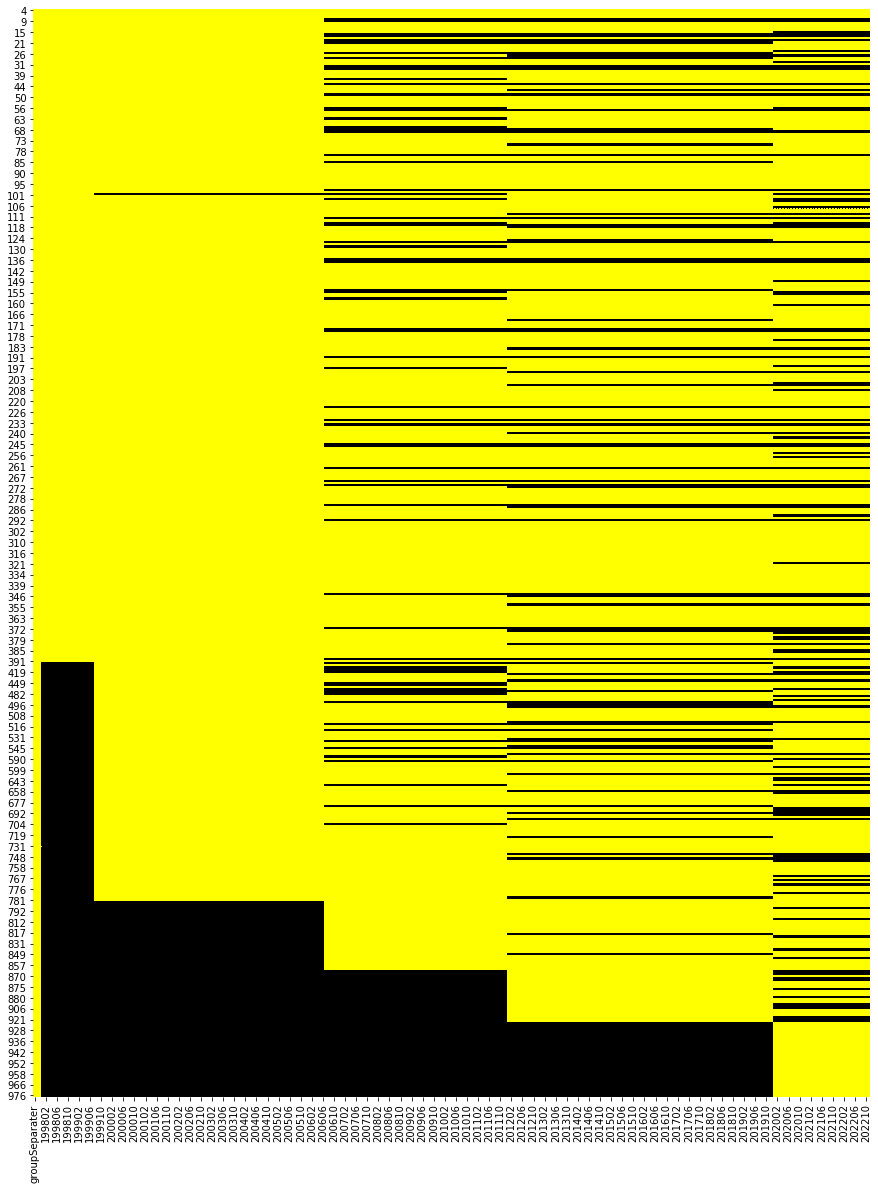

In [49]:
plt.figure(figsize=(15,20))
sns.heatmap(df_itens7_tot.isnull(), cbar=False, cmap="gnuplot_r")
plt.show()

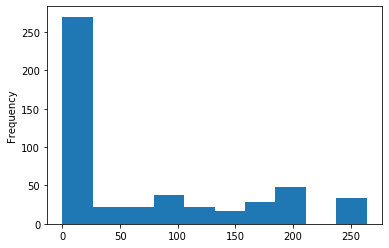

In [50]:
# DF dos valores nulos para cada Item. No df antes de 2020
#
df_itens7_tot = df_itens7_tot.drop(columns=['groupSeparater','Itens'])
df_itens7_tot.set_index('ID_Iten', inplace=True)
pd_serie_itens7_tot = df_itens7_tot.isna().sum(axis=1)
pd_serie_itens7_tot = pd_serie_itens7_tot.sort_values(ascending=True)

# Visualisar grafico Histograma
#
pd_serie_itens7_tot.plot(kind="hist")

# 5 Definindo DF com os valores Grupos desejados

- vereficando n grupos em 2020 e se tem mais grupos antes.

In [51]:
# df 2020_r 
#
df_var_g9_2020_r = df_var_tot_2020_r[(df_var_tot_2020_r['groupSeparater'] == 1)]

# Df 2020 até nove grupos
#
df_var_g9 = df_variacao_2020[(df_variacao_2020['groupSeparater'] == 1)]


df_var_g9

,groupSeparater,ID_Iten,Itens,202001,202002,202003,202004,202005,202006,202007,...,202202,202203,202204,202205,202206,202207,202208,202209,202210,202211
1,1,1,Alimentação e bebidas,0.08,0.16,0.84,1.57,0.33,0.64,0.42,...,1.36,2.05,1.95,0.75,1.08,1.62,0.53,-0.27,0.68,0.33
189,1,2,Habitação,0.55,-0.39,0.13,-0.10,-0.25,0.04,0.80,...,0.54,1.15,-1.14,-1.70,0.41,-1.05,0.10,0.60,0.34,0.51
229,1,3,Artigos de residência,-0.07,-0.08,-1.08,-1.37,0.58,1.30,0.90,...,1.76,0.57,1.53,0.66,0.55,0.12,0.42,-0.13,0.39,-0.68
270,1,4,Vestuário,-0.48,-0.73,0.21,0.10,-0.58,-0.46,-0.52,...,0.88,1.82,1.26,2.11,1.67,0.58,1.69,1.77,1.22,1.10
312,1,5,Transportes,0.32,-0.23,-0.90,-2.66,-1.90,0.31,0.78,...,0.46,3.02,1.91,1.34,0.57,-4.50,-3.37,-1.98,0.58,0.83
345,1,6,Saúde e cuidados pessoais,-0.32,0.73,0.21,-0.22,-0.10,0.35,0.44,...,0.47,0.88,1.77,1.01,1.24,0.49,1.31,0.57,1.16,0.02
391,1,7,Despesas pessoais,0.35,0.31,-0.23,-0.14,-0.04,-0.05,-0.11,...,0.64,0.59,0.48,0.52,0.49,1.13,0.54,0.95,0.57,0.21
421,1,8,Educação,0.16,3.70,0.59,0.00,0.02,0.05,-0.12,...,5.61,0.15,0.06,0.04,0.09,0.06,0.61,0.12,0.18,0.02
446,1,9,Comunicação,0.12,0.21,0.04,-0.20,0.24,0.75,0.51,...,0.29,-0.05,0.08,0.72,0.16,0.07,-1.10,-2.08,-0.48,-0.14


In [52]:
df_var_g9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 1 to 446
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   groupSeparater  9 non-null      int64 
 1   ID_Iten         9 non-null      object
 2   Itens           9 non-null      object
 3   202001          9 non-null      object
 4   202002          9 non-null      object
 5   202003          9 non-null      object
 6   202004          9 non-null      object
 7   202005          9 non-null      object
 8   202006          9 non-null      object
 9   202007          9 non-null      object
 10  202008          9 non-null      object
 11  202009          9 non-null      object
 12  202010          9 non-null      object
 13  202011          9 non-null      object
 14  202012          9 non-null      object
 15  202101          9 non-null      object
 16  202102          9 non-null      object
 17  202103          9 non-null      object
 18  202104      

Não temos valores nullos para ele

Podemos ver que Transporte repete duas vezes. vamos usar ambas?

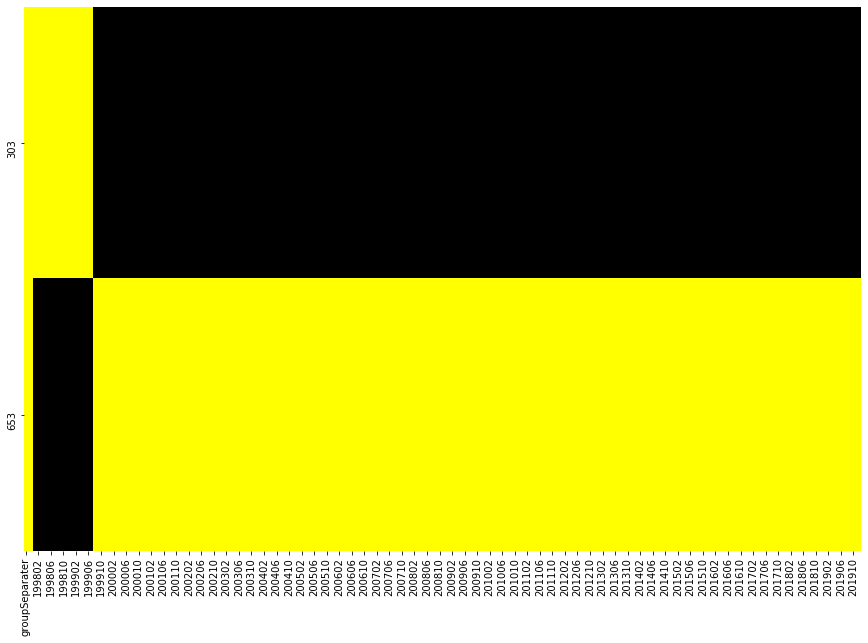

In [53]:
# Visualisando frequencia dos valores e nullos.
#
df_visualisar_grupo5 = df_var_g9_2020_r[df_var_g9_2020_r['ID_Iten'] == '5']
plt.figure(figsize=(15,10))
sns.heatmap(df_visualisar_grupo5.isnull(), cbar=False, cmap="gnuplot_r")
plt.show()

Podemos assumir a mesma situação quye ocorreu para os alores dos itens. Vamos montar a memsa folruma aqui.

In [54]:
### **************AQUI NOS CONSEGUIMOS PREENCHER OS VALORES NULOS DE CADA UMA*******#######
print(len(df_var_g9_2020_r))

df_var_g9_2020_r = df_var_g9_2020_r.groupby('ID_Iten').apply(lambda x : x.ffill().bfill())

# Dropamos os valores duplicados, mantendo o ultimo que corresponde ao mesmo nome para o outro df de 2020 para frente
df_var_g9_2020_r = df_var_g9_2020_r.drop_duplicates(subset=['ID_Iten'], keep='last')

# Visualisando
df_var_g9_2020_r

10


,groupSeparater,ID_Iten,Itens,199801,199802,199803,199804,199805,199806,199807,...,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912
1,1,1,Alimentação e bebidas,0.64,0.35,0.46,0.73,1.59,0.37,-0.71,...,1.05,0.42,-0.31,0.10,0.45,-0.02,-0.29,-0.05,0.42,3.17
186,1,2,Habitação,0.30,0.26,0.38,0.29,0.13,0.05,0.00,...,0.25,0.24,0.98,0.07,1.20,1.19,0.02,-0.61,0.71,-0.82
216,1,3,Artigos de residência,0.35,0.36,1.15,-0.20,-0.06,0.37,-0.52,...,0.27,-0.24,-0.10,0.02,0.29,0.56,-0.76,-0.09,-0.36,-0.48
253,1,4,Vestuário,-0.57,-0.13,-0.48,-0.78,-0.14,0.00,-0.06,...,0.45,0.18,0.34,0.30,-0.52,0.23,0.27,0.63,0.35,0.00
331,1,6,Saúde e cuidados pessoais,0.57,0.39,0.57,0.45,0.50,0.03,0.52,...,0.42,1.51,0.59,0.64,-0.20,-0.03,0.58,0.40,0.21,0.42
367,1,7,Despesas pessoais,1.59,1.02,-0.04,-0.05,0.40,-0.41,0.35,...,0.16,0.17,0.16,0.15,0.44,0.31,0.04,0.20,1.23,0.92
653,1,5,Transportes,0.62,0.57,0.13,-0.08,-0.06,-0.10,0.32,...,1.44,0.94,0.07,-0.31,-0.17,-0.39,0.00,0.45,0.30,1.54
753,1,8,Educação,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.32,0.09,-0.04,0.14,0.04,0.16,0.04,0.03,0.08,0.20
773,1,9,Comunicação,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.22,0.03,-0.03,-0.02,0.57,0.09,-0.01,-0.01,-0.02,0.66


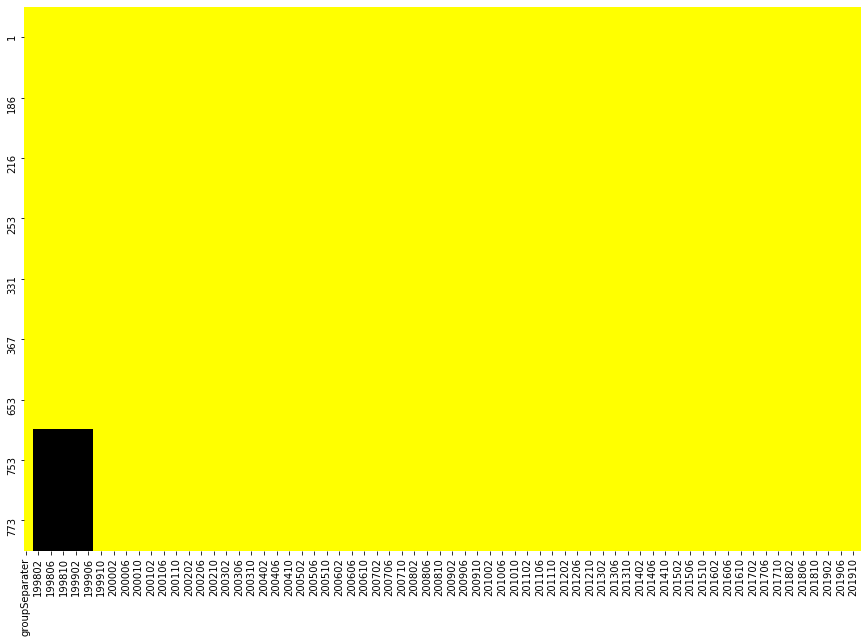

In [55]:
# Visualisando frequencia dos valores e nullos.
#
df_visualisar_grupo5 = df_var_g9_2020_r[df_var_g9_2020_r['ID_Iten'] == '5']
plt.figure(figsize=(15,10))
sns.heatmap(df_var_g9_2020_r.isnull(), cbar=False, cmap="gnuplot_r")
plt.show()

Provavelmente faria sentrido eleminar esse valores dessa data com nullos. Porque não temos o peso deles mesmo.

In [56]:
# DF inicia a Partir de 199801
df_var_g9_2020_r = df_var_g9_2020_r.dropna(axis=1)
#
# sort value
df_var_g9_2020_r = df_var_g9_2020_r.sort_values(by=['ID_Iten'])

#### Agora para peso

In [57]:
# DF antes de 2020
#
#
# Estou tirando o DF de 2020 nesse caso, para separar os itens que eu sei que vou usar
df_peso_2020_r =  pd.concat([df_peso_2006_2011,df_peso_2012_2019], axis=1)


# Separando em valor chave ID cada Grupo, Subgrupo, Categoria, Itens.
#
df_peso_2020_r.reset_index(inplace=True)
df_peso_2020_r = df_peso_2020_r.rename(columns = {'index':'Itens'})
df_peso_2020_r[['ID_Iten', 'Itens']] = df_peso_2020_r['Itens'].str.split('.', 1, expand=True)
pd_serie_id_coluna = df_peso_2020_r.pop('ID_Iten')
df_peso_2020_r.insert(0,'ID_Iten',pd_serie_id_coluna)

# Definido em uma coluna que é Grupo, Subgrupo, Categoria, Itens.
#
lst_groupSeparater = []
for i in df_peso_2020_r.ID_Iten:
    lst_groupSeparater.append(len(i))
    
df_peso_2020_r['groupSeparater'] = lst_groupSeparater
pd_serie_groupSeparater = df_peso_2020_r.pop('groupSeparater')
df_peso_2020_r.insert(0,'groupSeparater',pd_serie_groupSeparater)


# Mudando valor Nullo para IPCA
df_peso_2020_r["Itens"].fillna("IPCA", limit = 1, inplace = True)
# Mudando celula Indice geral para zero
df_peso_2020_r['ID_Iten'] = df_peso_2020_r['ID_Iten'].replace('Índice geral','0')




### **************AQUI NOS CONSEGUIMOS PREENCHER OS VALORES NULOS DE CADA UMA*******#######
print(len(df_peso_2020_r))

df_peso_2020_r = df_peso_2020_r.groupby('ID_Iten').apply(lambda x : x.ffill().bfill())

# Dropamos os valores duplicados
df_peso_2020_r = df_peso_2020_r.drop_duplicates(subset=['ID_Iten'], keep='first')

# numero de linhas
print(len(df_peso_2020_r))


540
510


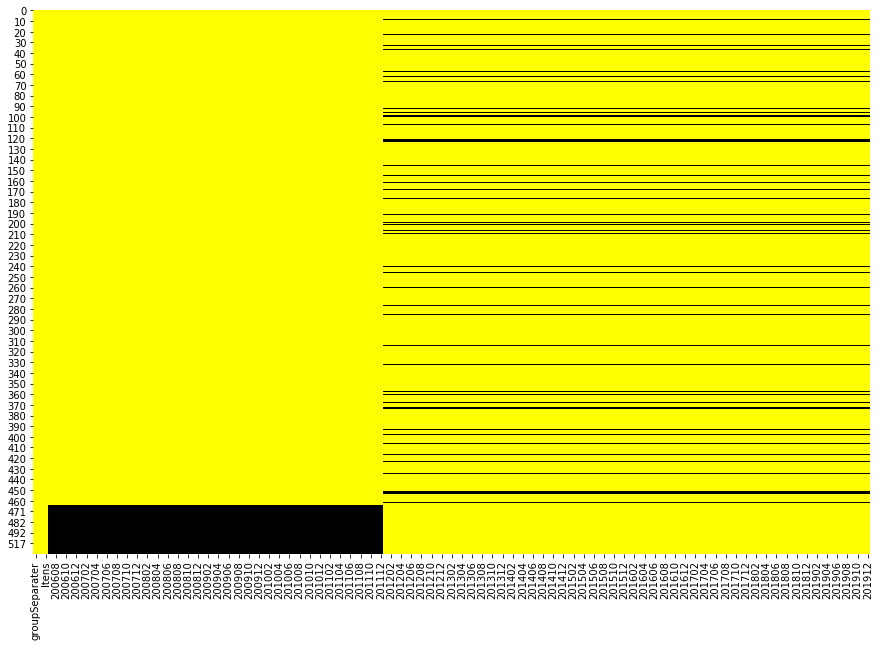

In [58]:
plt.figure(figsize=(15,10))
sns.heatmap(df_peso_2020_r.isnull(), cbar=False, cmap="gnuplot_r")
plt.show()

### Vamos começar com g9

In [59]:
df_peso_g9_2020_r = df_peso_2020_r[df_peso_2020_r['groupSeparater'] == 1]
df_peso_g9_2020_r

,groupSeparater,ID_Iten,Itens,200607,200608,200609,200610,200611,200612,200701,...,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912
1,1,1,Alimentação e bebidas,20.2879,20.3005,20.3177,20.3085,20.4428,20.5662,20.5320,...,24.7905,24.8811,24.8535,24.7282,24.7272,24.7651,24.7141,24.6423,24.6125,24.6081
180,1,2,Habitação,13.7079,13.6722,13.6776,13.7042,13.6826,13.6345,13.5986,...,15.8276,15.7617,15.7190,15.8434,15.8381,15.9815,16.1412,16.1458,16.0349,16.0780
219,1,3,Artigos de residência,4.8371,4.8277,4.8179,4.8003,4.7631,4.7500,4.7195,...,3.9740,3.9587,3.9285,3.9168,3.9136,3.9135,3.9283,3.8987,3.8928,3.8621
261,1,4,Vestuário,6.5229,6.4930,6.4951,6.5112,6.5287,6.5528,6.5901,...,5.6695,5.6571,5.6374,5.6454,5.6566,5.6115,5.6139,5.6288,5.6610,5.6556
307,1,5,Transportes,20.9585,20.9877,20.9063,20.8573,20.7546,20.6775,20.8161,...,18.1926,18.3309,18.4073,18.3853,18.3113,18.2261,18.1195,18.1208,18.1880,18.1612
342,1,6,Saúde e cuidados pessoais,10.7483,10.7711,10.7854,10.7914,10.7908,10.7843,10.7641,...,12.0765,12.0455,12.1649,12.2142,12.2811,12.2195,12.1918,12.2639,12.3036,12.2752
389,1,7,Despesas pessoais,9.2604,9.3009,9.3842,9.4474,9.4948,9.5336,9.5307,...,10.9067,10.8514,10.8143,10.8106,10.8174,10.8320,10.8451,10.8515,10.8649,10.9504
426,1,8,Educação,7.1207,7.1107,7.1040,7.0874,7.0745,7.0570,7.0353,...,5.0710,5.0530,5.0313,5.0198,5.0224,5.0092,5.0078,5.0102,5.0075,4.9898
455,1,9,Comunicação,6.5564,6.5363,6.5117,6.4922,6.4680,6.4441,6.4136,...,3.4916,3.4606,3.4438,3.4363,3.4323,3.4415,3.4382,3.4381,3.4348,3.4196


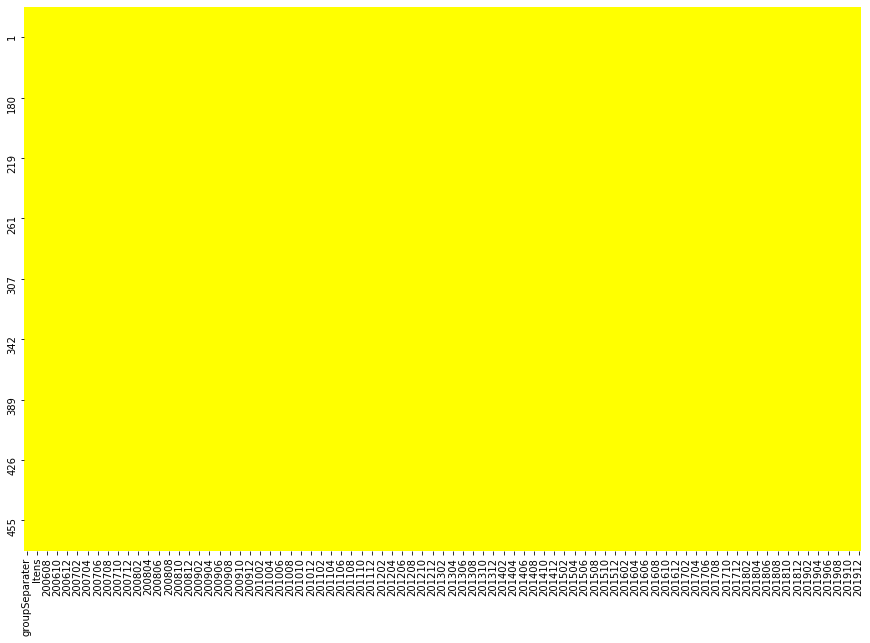

In [60]:
plt.figure(figsize=(15,10))
sns.heatmap(df_peso_g9_2020_r.isnull(), cbar=False, cmap="gnuplot_r")
plt.show()

Agora vamos filtrar o que separamos para var em Peso

In [61]:
df_variacao_2020
df_peso_2020

,202001,202002,202003,202004,202005,202006,202007,202008,202009,202010,...,202202,202203,202204,202205,202206,202207,202208,202209,202210,202211
Índice geral,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,...,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000
1.Alimentação e bebidas,19.3483,19.3338,19.3156,19.4758,19.8515,19.9887,20.0548,20.0484,20.2181,20.5862,...,20.7719,20.8413,20.9462,21.1365,21.1823,21.2566,21.7365,21.9207,21.9126,21.9333
11.Alimentação no domicílio,13.4813,13.4310,13.4172,13.5481,13.8567,13.9686,14.0398,14.0760,14.2694,14.6266,...,15.0615,15.1692,15.3302,15.5403,15.5853,15.6310,16.0197,16.1410,16.0834,16.1124
"1101.Cereais, leguminosas e oleaginosas",0.6927,0.6925,0.6934,0.7059,0.7657,0.7942,0.8189,0.8214,0.8311,0.9303,...,0.8104,0.8148,0.8339,0.8570,0.8625,0.8622,0.8638,0.8568,0.8422,0.8233
1101002.Arroz,0.4753,0.4797,0.4846,0.4974,0.5281,0.5390,0.5514,0.5617,0.5786,0.6737,...,0.5843,0.5817,0.5950,0.6108,0.6082,0.5984,0.6021,0.6027,0.5949,0.5847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9101010.Tv por assinatura,0.4076,0.4070,0.4060,0.4059,0.4070,0.4085,0.4074,0.4056,0.4044,0.4017,...,0.3534,0.3498,0.3446,0.3410,0.3527,0.3502,0.3523,0.3532,0.3540,0.3519
9101018.Acesso à internet,0.5533,0.5525,0.5510,0.5510,0.5529,0.5550,0.5533,0.5507,0.5957,0.5912,...,0.5187,0.5135,0.5056,0.5004,0.4977,0.4940,0.4976,0.4995,0.4479,0.4377
9101019.Aparelho telefônico,1.0192,1.0248,1.0226,1.0235,1.0154,1.0331,1.0484,1.0551,1.0435,1.0435,...,0.9735,0.9772,0.9592,0.9531,0.9443,0.9349,0.9444,0.9454,0.9441,0.9347
9101115.Serviços de streaming,0.0707,0.0706,0.0704,0.0704,0.0707,0.0710,0.0707,0.0704,0.0702,0.0697,...,0.0715,0.0708,0.0697,0.0690,0.0687,0.0737,0.0741,0.0744,0.0746,0.0741


In [62]:
# Antes
#
print(len(df_var_g9_2020_r.columns),len(df_peso_g9_2020_r.columns))


# Lista dos valores das colunas
#
lst_filter_r = df_peso_g9_2020_r.columns.values.tolist()
df_var_g9_2020_r = df_var_g9_2020_r.filter(items=lst_filter_r)

# Depois
#
print(len(df_var_g9_2020_r.columns))

248 165
165


#### Datas de 2020

In [63]:
df_variacao_2020_ok = df_variacao_2020

# Definido em uma coluna que é Grupo, Subgrupo, Categoria, Itens.
#
lst_groupSeparater = []
for i in df_variacao_2020_ok.ID_Iten:
    lst_groupSeparater.append(len(i))
    
df_variacao_2020_ok['groupSeparater'] = lst_groupSeparater
pd_serie_groupSeparater = df_variacao_2020_ok.pop('groupSeparater')
df_variacao_2020_ok.insert(0,'groupSeparater',pd_serie_groupSeparater)


# Mudando valor Nullo para IPCA
df_variacao_2020_ok["Itens"].fillna("IPCA", limit = 1, inplace = True)
# Mudando celula Indice geral para zero
df_variacao_2020_ok['ID_Iten'] = df_variacao_2020_ok['ID_Iten'].replace('Índice geral','0')

if 'level_0' in df_variacao_2020_ok.columns:
    df_variacao_2020_ok = df_variacao_2020_ok.drop(columns=['level_0'])
    

df_variacao_g9_2020 = df_variacao_2020_ok[df_variacao_2020_ok['groupSeparater'] == 1]
df_variacao_i377_2020 = df_variacao_2020_ok[df_variacao_2020_ok['groupSeparater'] == 7]


df_variacao_g9_2020.head()

,groupSeparater,ID_Iten,Itens,202001,202002,202003,202004,202005,202006,202007,...,202202,202203,202204,202205,202206,202207,202208,202209,202210,202211
1,1,1,Alimentação e bebidas,0.08,0.16,0.84,1.57,0.33,0.64,0.42,...,1.36,2.05,1.95,0.75,1.08,1.62,0.53,-0.27,0.68,0.33
189,1,2,Habitação,0.55,-0.39,0.13,-0.10,-0.25,0.04,0.80,...,0.54,1.15,-1.14,-1.70,0.41,-1.05,0.10,0.60,0.34,0.51
229,1,3,Artigos de residência,-0.07,-0.08,-1.08,-1.37,0.58,1.30,0.90,...,1.76,0.57,1.53,0.66,0.55,0.12,0.42,-0.13,0.39,-0.68
270,1,4,Vestuário,-0.48,-0.73,0.21,0.10,-0.58,-0.46,-0.52,...,0.88,1.82,1.26,2.11,1.67,0.58,1.69,1.77,1.22,1.10
312,1,5,Transportes,0.32,-0.23,-0.90,-2.66,-1.90,0.31,0.78,...,0.46,3.02,1.91,1.34,0.57,-4.50,-3.37,-1.98,0.58,0.83


In [64]:
df_var_g9_2020_r.head()

,groupSeparater,ID_Iten,Itens,200607,200608,200609,200610,200611,200612,200701,...,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912
1,1,1,Alimentação e bebidas,0.29,0.15,0.18,1.04,0.88,0.27,0.99,...,1.05,0.42,-0.31,0.10,0.45,-0.02,-0.29,-0.05,0.42,3.17
186,1,2,Habitação,-0.02,0.11,0.42,0.20,-0.08,0.19,0.07,...,0.25,0.24,0.98,0.07,1.20,1.19,0.02,-0.61,0.71,-0.82
216,1,3,Artigos de residência,0.02,-0.14,-0.14,-0.41,0.00,-0.18,0.29,...,0.27,-0.24,-0.10,0.02,0.29,0.56,-0.76,-0.09,-0.36,-0.48
253,1,4,Vestuário,-0.24,0.09,0.46,0.64,0.65,1.00,-0.19,...,0.45,0.18,0.34,0.30,-0.52,0.23,0.27,0.63,0.35,0.00
653,1,5,Transportes,0.37,-0.32,-0.01,-0.13,-0.09,1.14,0.62,...,1.44,0.94,0.07,-0.31,-0.17,-0.39,0.00,0.45,0.30,1.54


Merge dos dois DF's

In [65]:
print(
    f"{len(df_var_g9_2020_r.columns)} + {len(df_variacao_g9_2020.columns)} = {len(df_var_g9_2020_r.columns) + len(df_variacao_g9_2020.columns)}\n-3 =")

print(len(df_var_g9_2020_r.columns) + len(df_variacao_g9_2020.columns) - 3)


# Então se eu der merge tem que dar exatamente 200 colunas!
#
#
if len(pd.merge(df_var_g9_2020_r,df_variacao_g9_2020).columns) == len(df_var_g9_2020_r.columns) + len(df_variacao_g9_2020.columns) - 3:
    print("ok, vou transfromar no df")
    df_var_g9_tot = pd.merge(df_var_g9_2020_r,df_variacao_g9_2020)
else:
    print("nok!!!!!")
    

165 + 38 = 203
-3 =
200
ok, vou transfromar no df


In [66]:
df_variacao_2012_2019

,201201,201202,201203,201204,201205,201206,201207,201208,201209,201210,...,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912
Índice geral,0.48,0.48,0.19,0.63,0.39,0.15,0.50,0.45,0.62,0.57,...,0.67,0.52,0.19,0.10,0.29,0.19,-0.01,0.07,0.44,1.09
1.Alimentação e bebidas,0.53,0.31,0.18,0.47,0.86,1.00,1.17,1.08,1.46,1.24,...,1.05,0.42,-0.31,0.10,0.45,-0.02,-0.29,-0.05,0.42,3.17
11.Alimentação no domicílio,0.17,0.16,0.12,0.56,1.03,1.14,1.18,1.21,2.01,1.36,...,1.57,0.30,-0.52,0.13,0.60,-0.35,-0.50,-0.23,0.55,4.42
"1101.Cereais, leguminosas e oleaginosas",4.79,4.69,1.65,5.74,4.88,0.01,-1.18,-1.87,3.80,5.48,...,5.85,-2.57,-5.22,-4.90,-1.83,0.62,-0.72,-1.15,1.52,5.41
1101002.Arroz,0.85,1.28,2.01,2.59,1.44,0.88,0.87,2.05,7.75,8.65,...,0.83,1.73,-0.64,0.27,0.60,0.96,-0.02,-1.14,0.03,-0.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9101008.Telefone celular,0.00,0.00,0.00,1.00,0.62,0.00,0.00,0.10,0.16,0.81,...,0.00,0.00,0.00,0.00,1.46,0.43,0.00,0.00,0.00,0.00
9101018.Acesso à internet,0.00,0.00,0.00,0.39,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9101019.Aparelho telefônico,-1.23,-0.33,-0.22,-0.93,0.61,-0.24,-0.64,-0.96,-0.45,1.16,...,-1.44,0.68,-0.95,-0.53,0.18,0.17,-1.78,-0.48,-0.54,0.26
9101021.Telefone com internet - pacote,0.00,0.00,0.00,0.00,0.00,0.00,0.95,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.44


In [67]:
df_peso = df_peso_tot
# Transformar Indice em coluna.
#
#
df_peso.reset_index(inplace=True)
df_peso = df_peso.rename(columns = {'index':'Itens'})
#
#
# Separar em duas colunas. Numero ID e Itens,Categorias,Subgrupos,Grupos.
df_peso[['ID_Iten', 'Itens']] = df_peso['Itens'].str.split('.', 1, expand=True)
#
# Ordenando colunas
pd_serie_id_coluna = df_peso.pop('ID_Iten')
df_peso.insert(0,'ID_Iten',pd_serie_id_coluna)


# Definido em uma coluna que é Grupo, Subgrupo, Categoria, Itens.
#
lst_groupSeparater = []
for i in df_peso.ID_Iten:
    lst_groupSeparater.append(len(i))
    
df_peso['groupSeparater'] = lst_groupSeparater
pd_serie_groupSeparater = df_peso.pop('groupSeparater')
df_peso.insert(0,'groupSeparater',pd_serie_groupSeparater)


# Mudando valor Nullo para IPCA
df_peso["Itens"].fillna("IPCA", limit = 1, inplace = True)
# Mudando celula Indice geral para zero
df_peso['ID_Iten'] = df_peso['ID_Iten'].replace('Índice geral','0')

if 'level_0' in df_peso.columns:
    print("1..")
    df_peso = df_peso.drop(columns=['level_0'])
    
if 'level_0' in df_peso_tot.columns:
        print("2...")
        df_peso_tot = df_peso_tot.drop(columns=['level_0'])
    

df_peso_g = df_peso[(df_peso['groupSeparater'] == 1) | (df_peso['groupSeparater'] == 12)]
df_peso_i = df_peso[(df_peso['groupSeparater'] == 7) | (df_peso['groupSeparater'] == 12)]



In [68]:
df_peso_g

,groupSeparater,ID_Iten,Itens,200607,200608,200609,200610,200611,200612,200701,...,202202,202203,202204,202205,202206,202207,202208,202209,202210,202211
0,12,0,IPCA,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,...,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000
1,1,1,Alimentação e bebidas,20.2879,20.3005,20.3177,20.3085,20.4428,20.5662,20.5320,...,20.7719,20.8413,20.9462,21.1365,21.1823,21.2566,21.7365,21.9207,21.9126,21.9333
180,1,2,Habitação,13.7079,13.6722,13.6776,13.7042,13.6826,13.6345,13.5986,...,16.0918,16.0135,15.9528,15.6088,15.2635,15.2172,15.1433,15.1981,15.3245,15.2868
219,1,3,Artigos de residência,4.8371,4.8277,4.8179,4.8003,4.7631,4.7500,4.7195,...,3.9253,3.9546,3.9167,3.9366,3.9417,3.9342,3.9639,3.9938,3.9983,3.9902
261,1,4,Vestuário,6.5229,6.4930,6.4951,6.5112,6.5287,6.5528,6.5901,...,4.3637,4.3579,4.3694,4.3797,4.4485,4.4895,4.5453,4.6377,4.7308,4.7606
307,1,5,Transportes,20.9585,20.9877,20.9063,20.8573,20.7546,20.6775,20.8161,...,21.7664,21.6435,21.9543,22.1471,22.3293,22.2938,21.4280,20.7694,20.4050,20.4066
342,1,6,Saúde e cuidados pessoais,10.7483,10.7711,10.7854,10.7914,10.7908,10.7843,10.7641,...,12.3758,12.3090,12.2315,12.3203,12.3796,12.4411,12.5783,12.7826,12.8857,12.9576
389,1,7,Despesas pessoais,9.2604,9.3009,9.3842,9.4474,9.4948,9.5336,9.5307,...,9.9107,9.8731,9.7816,9.7278,9.7285,9.7053,9.8732,9.9565,10.0751,10.0731
426,1,8,Educação,7.1207,7.1107,7.1040,7.0874,7.0745,7.0570,7.0353,...,5.5490,5.8002,5.7216,5.6666,5.6395,5.6035,5.6388,5.6898,5.7102,5.6864
455,1,9,Comunicação,6.5564,6.5363,6.5117,6.4922,6.4680,6.4441,6.4136,...,5.2454,5.2069,5.1260,5.0765,5.0870,5.0589,5.0926,5.0514,4.9579,4.9053


In [69]:

df_var_g9_tot

,groupSeparater,ID_Iten,Itens,200607,200608,200609,200610,200611,200612,200701,...,202202,202203,202204,202205,202206,202207,202208,202209,202210,202211
0,1,1,Alimentação e bebidas,0.29,0.15,0.18,1.04,0.88,0.27,0.99,...,1.36,2.05,1.95,0.75,1.08,1.62,0.53,-0.27,0.68,0.33
1,1,2,Habitação,-0.02,0.11,0.42,0.20,-0.08,0.19,0.07,...,0.54,1.15,-1.14,-1.70,0.41,-1.05,0.10,0.60,0.34,0.51
2,1,3,Artigos de residência,0.02,-0.14,-0.14,-0.41,0.00,-0.18,0.29,...,1.76,0.57,1.53,0.66,0.55,0.12,0.42,-0.13,0.39,-0.68
3,1,4,Vestuário,-0.24,0.09,0.46,0.64,0.65,1.00,-0.19,...,0.88,1.82,1.26,2.11,1.67,0.58,1.69,1.77,1.22,1.10
4,1,5,Transportes,0.37,-0.32,-0.01,-0.13,-0.09,1.14,0.62,...,0.46,3.02,1.91,1.34,0.57,-4.50,-3.37,-1.98,0.58,0.83
5,1,6,Saúde e cuidados pessoais,0.44,0.20,0.28,0.37,0.22,0.25,0.47,...,0.47,0.88,1.77,1.01,1.24,0.49,1.31,0.57,1.16,0.02
6,1,7,Despesas pessoais,0.67,0.96,0.89,0.87,0.69,0.44,0.70,...,0.64,0.59,0.48,0.52,0.49,1.13,0.54,0.95,0.57,0.21
7,1,8,Educação,0.09,-0.02,-0.01,0.17,0.03,0.17,0.07,...,5.61,0.15,0.06,0.04,0.09,0.06,0.61,0.12,0.18,0.02
8,1,9,Comunicação,-0.07,-0.30,-0.07,-0.01,-0.10,-0.01,0.07,...,0.29,-0.05,0.08,0.72,0.16,0.07,-1.10,-2.08,-0.48,-0.14


In [70]:
#CAPTURANDO SÓ O IPCA 

df_var_tot = pd.concat([df_c,df_d,df_e], axis=1)


df_var_tot = df_var_tot[:6]

# Transformar Indice em coluna.
#
#
df_var_tot.reset_index(inplace=True)
df_var_tot = df_var_tot.rename(columns = {'index':'Itens'})

#
#
# Separar em duas colunas. Numero ID e Itens,Categorias,Subgrupos,Grupos.
df_var_tot[['ID_Iten', 'Itens']] = df_var_tot['Itens'].str.split('.', 1, expand=True)

#
# Ordenando colunas
pd_serie_id_coluna = df_var_tot.pop('ID_Iten')
df_var_tot.insert(0,'ID_Iten',pd_serie_id_coluna)



# Definido em uma coluna que é Grupo, Subgrupo, Categoria, Itens.
#
lst_groupSeparater = []
for i in df_var_tot.ID_Iten:
    lst_groupSeparater.append(len(i))
    
df_var_tot['groupSeparater'] = lst_groupSeparater
pd_serie_groupSeparater = df_var_tot.pop('groupSeparater')
df_var_tot.insert(0,'groupSeparater',pd_serie_groupSeparater)


# Mudando valor Nullo para IPCA
df_var_tot["Itens"].fillna("IPCA", limit = 1, inplace = True)
# Mudando celula Indice geral para zero
df_var_tot['ID_Iten'] = df_var_tot['ID_Iten'].replace('Índice geral','0')

if 'level_0' in df_var_tot.columns:
    print("1..")
    df_var_tot = df_var_tot.drop(columns=['level_0'])


df_var_tot = df_var_tot[:1]
df_var_tot

,groupSeparater,ID_Iten,Itens,200607,200608,200609,200610,200611,200612,200701,...,202202,202203,202204,202205,202206,202207,202208,202209,202210,202211
0,12,0,IPCA,0.23,0.07,0.23,0.37,0.28,0.45,0.47,...,1.02,1.54,1.03,0.52,0.73,-0.61,-0.30,-0.23,0.59,0.36


In [71]:
df_var_g9_tot = df_var_g9_tot.append(df_var_tot, ignore_index=True)
df_var_g9_tot = df_var_g9_tot.sort_values(by=['ID_Iten'])


In [72]:

df_var_g9_tot['groupSeparater'] = df_var_g9_tot['groupSeparater'].replace(1,'Var')
df_var_g9_tot['groupSeparater'] = df_var_g9_tot['groupSeparater'].replace(12,'Var')
df_peso_g['groupSeparater'] = df_peso_g['groupSeparater'].replace(1,'Peso')
df_peso_g['groupSeparater'] = df_peso_g['groupSeparater'].replace(12,'Peso')
df_peso_g

C:\Users\drife\Downloads\Programacao\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\drife\Downloads\Programacao\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,groupSeparater,ID_Iten,Itens,200607,200608,200609,200610,200611,200612,200701,...,202202,202203,202204,202205,202206,202207,202208,202209,202210,202211
0,Peso,0,IPCA,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,...,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000
1,Peso,1,Alimentação e bebidas,20.2879,20.3005,20.3177,20.3085,20.4428,20.5662,20.5320,...,20.7719,20.8413,20.9462,21.1365,21.1823,21.2566,21.7365,21.9207,21.9126,21.9333
180,Peso,2,Habitação,13.7079,13.6722,13.6776,13.7042,13.6826,13.6345,13.5986,...,16.0918,16.0135,15.9528,15.6088,15.2635,15.2172,15.1433,15.1981,15.3245,15.2868
219,Peso,3,Artigos de residência,4.8371,4.8277,4.8179,4.8003,4.7631,4.7500,4.7195,...,3.9253,3.9546,3.9167,3.9366,3.9417,3.9342,3.9639,3.9938,3.9983,3.9902
261,Peso,4,Vestuário,6.5229,6.4930,6.4951,6.5112,6.5287,6.5528,6.5901,...,4.3637,4.3579,4.3694,4.3797,4.4485,4.4895,4.5453,4.6377,4.7308,4.7606
307,Peso,5,Transportes,20.9585,20.9877,20.9063,20.8573,20.7546,20.6775,20.8161,...,21.7664,21.6435,21.9543,22.1471,22.3293,22.2938,21.4280,20.7694,20.4050,20.4066
342,Peso,6,Saúde e cuidados pessoais,10.7483,10.7711,10.7854,10.7914,10.7908,10.7843,10.7641,...,12.3758,12.3090,12.2315,12.3203,12.3796,12.4411,12.5783,12.7826,12.8857,12.9576
389,Peso,7,Despesas pessoais,9.2604,9.3009,9.3842,9.4474,9.4948,9.5336,9.5307,...,9.9107,9.8731,9.7816,9.7278,9.7285,9.7053,9.8732,9.9565,10.0751,10.0731
426,Peso,8,Educação,7.1207,7.1107,7.1040,7.0874,7.0745,7.0570,7.0353,...,5.5490,5.8002,5.7216,5.6666,5.6395,5.6035,5.6388,5.6898,5.7102,5.6864
455,Peso,9,Comunicação,6.5564,6.5363,6.5117,6.4922,6.4680,6.4441,6.4136,...,5.2454,5.2069,5.1260,5.0765,5.0870,5.0589,5.0926,5.0514,4.9579,4.9053



Será que eu concateno? e faço isso para os itens?


In [73]:
df_g9 = pd.concat([df_var_g9_tot, df_peso_g])
df_g9.to_csv("df_g9.csv")
df_g9

,groupSeparater,ID_Iten,Itens,200607,200608,200609,200610,200611,200612,200701,...,202202,202203,202204,202205,202206,202207,202208,202209,202210,202211
9,Var,0,IPCA,0.23,0.07,0.23,0.37,0.28,0.45,0.47,...,1.02,1.54,1.03,0.52,0.73,-0.61,-0.30,-0.23,0.59,0.36
0,Var,1,Alimentação e bebidas,0.29,0.15,0.18,1.04,0.88,0.27,0.99,...,1.36,2.05,1.95,0.75,1.08,1.62,0.53,-0.27,0.68,0.33
1,Var,2,Habitação,-0.02,0.11,0.42,0.20,-0.08,0.19,0.07,...,0.54,1.15,-1.14,-1.70,0.41,-1.05,0.10,0.60,0.34,0.51
2,Var,3,Artigos de residência,0.02,-0.14,-0.14,-0.41,0.00,-0.18,0.29,...,1.76,0.57,1.53,0.66,0.55,0.12,0.42,-0.13,0.39,-0.68
3,Var,4,Vestuário,-0.24,0.09,0.46,0.64,0.65,1.00,-0.19,...,0.88,1.82,1.26,2.11,1.67,0.58,1.69,1.77,1.22,1.10
4,Var,5,Transportes,0.37,-0.32,-0.01,-0.13,-0.09,1.14,0.62,...,0.46,3.02,1.91,1.34,0.57,-4.50,-3.37,-1.98,0.58,0.83
5,Var,6,Saúde e cuidados pessoais,0.44,0.20,0.28,0.37,0.22,0.25,0.47,...,0.47,0.88,1.77,1.01,1.24,0.49,1.31,0.57,1.16,0.02
6,Var,7,Despesas pessoais,0.67,0.96,0.89,0.87,0.69,0.44,0.70,...,0.64,0.59,0.48,0.52,0.49,1.13,0.54,0.95,0.57,0.21
7,Var,8,Educação,0.09,-0.02,-0.01,0.17,0.03,0.17,0.07,...,5.61,0.15,0.06,0.04,0.09,0.06,0.61,0.12,0.18,0.02
8,Var,9,Comunicação,-0.07,-0.30,-0.07,-0.01,-0.10,-0.01,0.07,...,0.29,-0.05,0.08,0.72,0.16,0.07,-1.10,-2.08,-0.48,-0.14


In [74]:
# Falta resolver aqui.
#

df_itens7_tot
df_variacao_i377_2020

,groupSeparater,ID_Iten,Itens,202001,202002,202003,202004,202005,202006,202007,...,202202,202203,202204,202205,202206,202207,202208,202209,202210,202211
4,7,1101002,Arroz,1.06,1.30,2.66,5.83,1.69,2.56,2.36,...,0.59,3.90,3.71,0.12,-0.92,-0.03,-0.23,-1.52,-1.15,0.95
5,7,1101051,Feijão - mulatinho,-0.37,-5.42,5.20,14.52,-1.34,5.82,1.06,...,7.71,-4.29,1.66,-2.45,2.96,-0.28,3.30,2.26,-2.58,1.04
6,7,1101052,Feijão - preto,-2.68,2.52,1.24,10.41,7.44,6.75,1.24,...,3.05,2.60,0.76,-0.97,-3.33,-4.03,-3.07,-3.41,-1.76,1.18
7,7,1101053,Feijão - macáçar (fradinho),5.39,2.39,6.52,5.55,2.62,2.88,3.77,...,4.16,1.24,1.29,0.57,-3.30,-0.63,-2.07,-1.67,-1.06,-0.25
8,7,1101073,Feijão - carioca (rajado),-2.60,-3.55,-1.74,16.64,8.52,5.08,-4.96,...,4.63,6.23,6.52,6.87,9.19,-1.19,-4.46,-3.86,-3.96,-0.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,7,9101010,Tv por assinatura,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00
453,7,9101018,Acesso à internet,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-10.55,-1.71,0.00
454,7,9101019,Aparelho telefônico,0.67,0.04,0.12,-1.13,1.37,1.78,1.10,...,1.42,-0.33,0.41,-0.39,-0.28,0.40,-0.22,-0.36,-0.41,-2.49
455,7,9101115,Serviços de streaming,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,8.08,0.00,0.00,0.00,0.00,3.09


In [75]:
df_itens7_tot

,199801,199802,199803,199804,199805,199806,199807,199808,199809,199810,...,202202,202203,202204,202205,202206,202207,202208,202209,202210,202211
ID_Iten,,,,,,,,,,,,,,,,,,,,,
1101002,0.17,-0.65,-0.69,-1.08,11.18,8.62,1.54,-0.57,0.89,2.41,...,0.59,3.90,3.71,0.12,-0.92,-0.03,-0.23,-1.52,-1.15,0.95
1101051,8.91,1.31,11.14,17.10,85.05,7.76,-3.91,-11.50,-12.05,5.65,...,7.71,-4.29,1.66,-2.45,2.96,-0.28,3.30,2.26,-2.58,1.04
1101052,7.83,0.56,3.59,3.97,12.80,7.27,-6.31,-6.99,-3.70,-1.70,...,3.05,2.60,0.76,-0.97,-3.33,-4.03,-3.07,-3.41,-1.76,1.18
1101053,19.13,3.79,6.26,24.50,57.27,15.48,-0.12,-10.74,-28.45,-13.29,...,4.16,1.24,1.29,0.57,-3.30,-0.63,-2.07,-1.67,-1.06,-0.25
1101064,4.60,7.70,3.50,12.93,61.91,26.51,-9.99,-17.63,-8.28,8.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8101045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.31,0.00,0.00,0.00,0.00,0.00,1.02,0.00,0.00,0.00
8102007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.76,0.59,-0.11,0.00,0.36,0.10,0.00,0.00,0.00,0.00
8102008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.36,2.30,0.75,0.95,0.30,-1.69,2.12,1.87,2.84,0.84


In [76]:
#pd.concat([df_var_g9_2020_r, df_peso_g9_2020_r], ignore_index=True)